### Descripción breve del dataset

El dataset Online Retail contiene datos transaccionales de una tienda minorista de regalos en línea del Reino Unido, con registros de ventas entre diciembre de 2010 y diciembre de 2011. Es ampliamente usado para análisis de comportamiento de clientes, segmentación y minería de datos de ventas.

### Variables del dataset

InvoiceNo:
Código único de factura. Si empieza con “C” indica una factura cancelada o devolución.

StockCode:
Código de identificación del producto vendido.

Description:
Nombre o descripción del producto.

Quantity:
Cantidad de unidades vendidas del producto. Valores negativos indican devoluciones.

InvoiceDate:
Fecha y hora de la transacción (emisión de la factura).

UnitPrice:
Precio unitario del producto en libras esterlinas (GBP).

CustomerID:
ID único asignado a cada cliente. Puede faltar en algunos registros.

Country:
País del cliente al que se envía el pedido.

### Preparacion de datos

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
import matplotlib.patches as mpatches

Verificamos dimension del dataset

In [2]:
df_raw = pd.read_excel("dataset.xlsx")
print(f'Dimensiones del dataset: {df_raw.shape}')

Dimensiones del dataset: (541909, 8)


Visualizamos variables del dataset

In [3]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

Visualizamos los tipos de datos de cada variable

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Convertimos nombre de las variables a minusculas por comodidad

In [5]:
df_raw.columns = df_raw.columns.str.lower()
df_raw.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

Visualizamos los datos de las variables

In [6]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
invoiceno,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stockcode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
invoicedate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
unitprice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
customerid,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Verificamos datos duplicados

In [7]:
df_raw[df_raw.duplicated()]
print(f"Cantidad de filas duplicadas: {len(df_raw[df_raw.duplicated()])}")


Cantidad de filas duplicadas: 5268


Eliminamos duplicados

In [8]:
# Eliminar filas duplicadas
df_raw = df_raw.drop_duplicates()

print(f"Forma del dataset después de eliminar duplicados: {df_raw.shape}")
print(f"Filas eliminadas: {541909 - df_raw.shape[0]}")


Forma del dataset después de eliminar duplicados: (536641, 8)
Filas eliminadas: 5268


Analizamos y visualizamos valores nulos o faltantes

In [9]:
# Calcular cantidad de valores nulos
null_counts = df_raw.isnull().sum()
total_rows = len(df_raw)

# Calcular porcentajes
null_percentages = (null_counts / total_rows) * 100

# Crear DataFrame con ambos valores
null_summary = pd.DataFrame({
    'Cantidad_Nulos': null_counts,
    'Porcentaje_Nulos': null_percentages.round(2)
})

print("Resumen de valores nulos:")
print(null_summary)

# Mostrar algunos ejemplos de filas con valores nulos
print("\nEjemplos de filas con valores nulos:")
print("\nFilas con customerid nulo:")
print(df_raw[df_raw['customerid'].isnull()].head())

print("\nFilas con description nulo:")
print(df_raw[df_raw['description'].isnull()].head())

Resumen de valores nulos:
             Cantidad_Nulos  Porcentaje_Nulos
invoiceno                 0              0.00
stockcode                 0              0.00
description            1454              0.27
quantity                  0              0.00
invoicedate               0              0.00
unitprice                 0              0.00
customerid           135037             25.16
country                   0              0.00

Ejemplos de filas con valores nulos:

Filas con customerid nulo:
     invoiceno stockcode                      description  quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             invoicedate  unitprice  customerid         country  
6

Limpiamos valores nulos por su alto porcentaje de valores faltantes en la id de los clientes

In [10]:
# Crear una copia del dataset
df_clean = df_raw.copy()

# Mostrar información antes de eliminar valores nulos
print("Forma del dataset antes de eliminar valores nulos:")
print(f"Filas: {df_clean.shape[0]}, Columnas: {df_clean.shape[1]}")

# Mostrar cantidad de valores nulos por columna
print("\nValores nulos por columna:")
print(df_clean.isnull().sum())

# Eliminar filas con valores nulos
df_clean = df_clean.dropna()

# Mostrar información después de eliminar valores nulos
print(f"\nForma del dataset después de eliminar valores nulos:")
print(f"Filas: {df_clean.shape[0]}, Columnas: {df_clean.shape[1]}")
print(f"Filas eliminadas: {df_raw.shape[0] - df_clean.shape[0]}")

# Verificar que no quedan valores nulos
print(f"\nValores nulos restantes: {df_clean.isnull().sum().sum()}")


Forma del dataset antes de eliminar valores nulos:
Filas: 536641, Columnas: 8

Valores nulos por columna:
invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135037
country             0
dtype: int64

Forma del dataset después de eliminar valores nulos:
Filas: 401604, Columnas: 8
Filas eliminadas: 135037

Valores nulos restantes: 0


Los id de los clientes son del tipo float y lo convertimos a int

In [11]:
# Convertir CustomerID a entero
df_clean.customerid  = (df_clean.customerid).astype(int)
# Verificar que no quedan valores nulos
print(f"\nValores nulos restantes: {df_clean.isnull().sum().sum()}")
df_clean.info()


Valores nulos restantes: 0
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    401604 non-null  object        
 1   stockcode    401604 non-null  object        
 2   description  401604 non-null  object        
 3   quantity     401604 non-null  int64         
 4   invoicedate  401604 non-null  datetime64[ns]
 5   unitprice    401604 non-null  float64       
 6   customerid   401604 non-null  int64         
 7   country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


Analizamos la cantidad de devoluciones que contiene el dataset

In [12]:
# Contar la cantidad de devoluciones (invoiceno que contienen 'C')
devoluciones = df_clean[df_clean.invoiceno.str.contains('C', na=False)]
print(f"Cantidad de devoluciones: {len(devoluciones)}")

# Mostrar el porcentaje que representan las devoluciones del total
porcentaje = (len(devoluciones) / len(df_clean)) * 100
print(f"Porcentaje de devoluciones: {porcentaje:.2f}%")

# Mostrar algunos ejemplos de devoluciones
print("\nEjemplos de devoluciones:")
print(devoluciones.head())


Cantidad de devoluciones: 8872
Porcentaje de devoluciones: 2.21%

Ejemplos de devoluciones:
    invoiceno stockcode                       description  quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            invoicedate  unitprice  customerid         country  
141 2010-12-01 09:41:00      27.50       14527  United Kingdom  
154 2010-12-01 09:49:00       4.65       15311  United Kingdom  
235 2010-12-01 10:24:00       1.65       17548  United Kingdom  
236 2010-12-01 10:24:00       0.29       17548  United Kingdom  
237 2010-12-01 10:24:00       0.29       17548  United Kingdom  


Para nuestro analisis no tendremos en cuenta las devoluciones por lo tanto decidimos removerlas

In [13]:
# Chequeamos y removemos las transacciones con devoluciones
desc_df = df_clean[~df_clean.invoiceno.str.contains('C', na=False)]


Verificamos que se hayan eliminado del dataset

In [14]:
# Convertir invoiceno a string primero
desc_df['invoiceno'] = desc_df['invoiceno'].astype(str)

# Contar la cantidad de devoluciones (invoiceno que contienen 'C')
devoluciones = desc_df[desc_df.invoiceno.str.contains('C', na=False)]
print(f"Cantidad de devoluciones: {len(devoluciones)}")

# Mostrar el porcentaje que representan las devoluciones del total
porcentaje = (len(devoluciones) / len(desc_df)) * 100
print(f"Porcentaje de devoluciones: {porcentaje:.2f}%")

# Mostrar algunos ejemplos de devoluciones
print("\nEjemplos de devoluciones:")
print(devoluciones.head())

C:\Users\Matias\AppData\Local\Temp\ipykernel_2392\91193755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc_df['invoiceno'] = desc_df['invoiceno'].astype(str)


Cantidad de devoluciones: 0
Porcentaje de devoluciones: 0.00%

Ejemplos de devoluciones:
Empty DataFrame
Columns: [invoiceno, stockcode, description, quantity, invoicedate, unitprice, customerid, country]
Index: []


In [15]:
desc_df.shape

(392732, 8)

Creamos una nueva columna el cual representara el costo total de esa transaccion

In [16]:
# Creamos una nueva columna con el total de la transacción
desc_df['total_cost'] = desc_df.quantity * desc_df.unitprice

# Verificamos que la columna se haya creado correctamente
print(desc_df.head())

# Verificamos que la columna se haya creado correctamente
print(desc_df.tail())

# Verificamos que la columna se haya creado correctamente
print(desc_df.isnull().sum())

  invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid         country  total_cost  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
       invoiceno stockcode                      description  quantity  \
541904    581587     22613      PACK OF 20 S

C:\Users\Matias\AppData\Local\Temp\ipykernel_2392\1789297289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desc_df['total_cost'] = desc_df.quantity * desc_df.unitprice


Verificamos el rango de fechas del dataset

In [17]:
# Chequeamos la fecha mas antigua y la mas reciente
print(f'Oldest date is - {desc_df.invoicedate.min()}\n')
print(f'Latest date is - {desc_df.invoicedate.max()}')


Oldest date is - 2010-12-01 08:26:00

Latest date is - 2011-12-09 12:50:00


Podemos ver que las ventas generadas en 2010 son las pertenecientes a diciembre ya que la primera fecha de transaccion es "2010-12-01 08:26:00"

Frecuencia de ventas por mes en 2011:
invoicedate
1     20991
2     19707
3     26872
4     22435
5     28075
6     26926
7     26582
8     26796
9     39671
10    48796
11    63182
12    17026
Name: count, dtype: int64


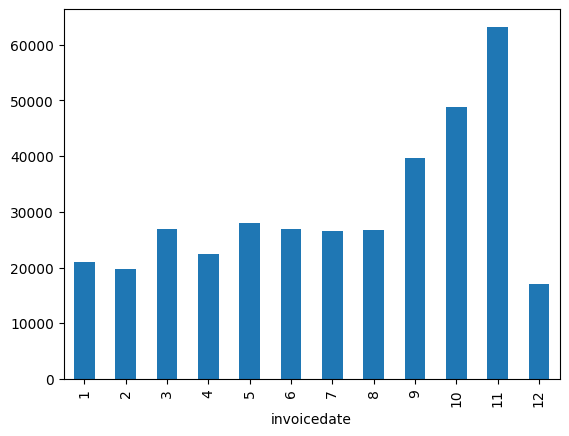

In [18]:
# Chequeamos los meses de ventas en 2011
desc_df[desc_df.invoicedate.dt.year==2011].invoicedate.dt.month.value_counts(sort=False).plot(kind='bar');

# Mostrar también los valores numéricos
print("Frecuencia de ventas por mes en 2011:")
print(desc_df[desc_df.invoicedate.dt.year==2011].invoicedate.dt.month.value_counts(sort=False))

Podemos observar una tendencia creciente mes a mes y que baja en diciembre ya que el dataset contiene hasta la fecha "2011-12-09 12:50:00" por lo que debe ser el motivo de su reduccion

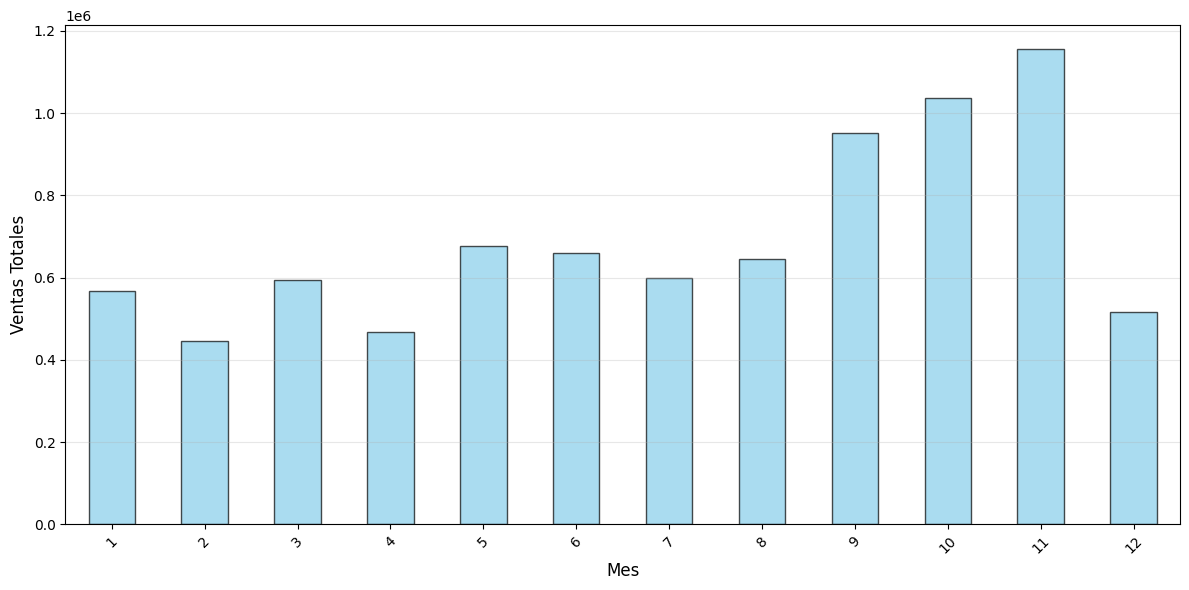

In [19]:
# Creamos una grafica del mes a mes con respecto al total

# Agrupar por mes y calcular el total de ventas para 2011
monthly_sales = desc_df[desc_df.invoicedate.dt.year==2011].groupby(desc_df.invoicedate.dt.month)['total_cost'].sum()

# Crear la gráfica con el estilo solicitado
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(range(len(monthly_sales)), range(1, 13), rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()





Podemos observar que el dinero generado por mes tiene el mismo patron

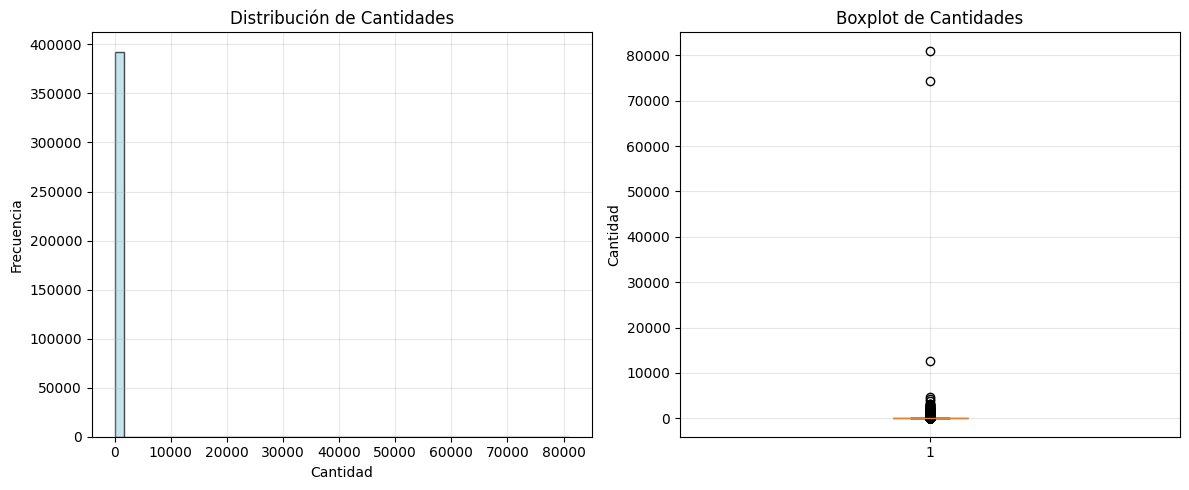

Estadísticas descriptivas de quantity:
count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: quantity, dtype: float64


In [20]:
# Crear histograma y boxplot para la variable quantity
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
ax1.hist(desc_df['quantity'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Cantidad')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Cantidades')
ax1.grid(alpha=0.3)

# Boxplot
ax2.boxplot(desc_df['quantity'], patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.7))
ax2.set_ylabel('Cantidad')
ax2.set_title('Boxplot de Cantidades')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas básicas
print("Estadísticas descriptivas de quantity:")
print(desc_df['quantity'].describe())


Podemos ver que quizas haya errores de tipeo por los valores atipicos observados

In [21]:
# Filtrar las observaciones con quantity mayores a 10000
quantities_altas = desc_df[desc_df['quantity'] > 10000]

# Mostrar las primeras filas de las observaciones con quantity > 10000
print("Observaciones con quantity mayores a 10000:")
print(quantities_altas[['description', 'quantity', 'invoicedate', 'customerid']].head())

# Mostrar el total de observaciones con quantity > 10000
print(f"\nTotal de observaciones con quantity mayores a 10000: {len(quantities_altas)}")


Observaciones con quantity mayores a 10000:
                           description  quantity         invoicedate  \
61619   MEDIUM CERAMIC TOP STORAGE JAR     74215 2011-01-18 10:01:00   
502122  ASSTD DESIGN 3D PAPER STICKERS     12540 2011-11-25 15:57:00   
540421     PAPER CRAFT , LITTLE BIRDIE     80995 2011-12-09 09:15:00   

        customerid  
61619        12346  
502122       13256  
540421       16446  

Total de observaciones con quantity mayores a 10000: 3


Como son valores atipicos y esto podria afectar a los resultados del analisis decidimos limpiarlos

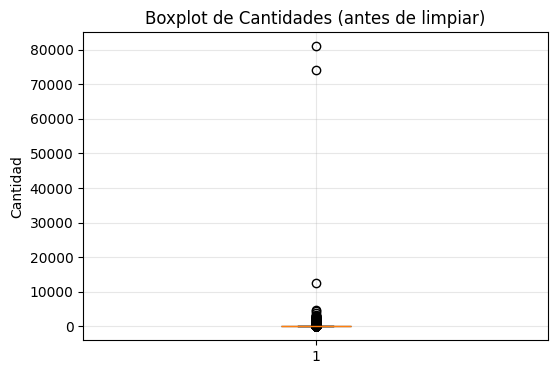

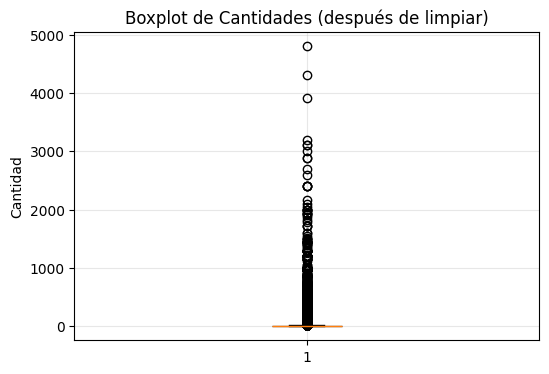

Cantidad de observaciones antes de limpiar: 392732
Cantidad de observaciones después de limpiar: 392729


In [22]:
# Mostrar boxplot de quantity antes de limpiar
plt.figure(figsize=(6,4))
plt.boxplot(desc_df['quantity'], patch_artist=True, boxprops=dict(facecolor='lightblue', alpha=0.7))
plt.title('Boxplot de Cantidades (antes de limpiar)')
plt.ylabel('Cantidad')
plt.grid(alpha=0.3)
plt.show()

# Limpiar observaciones con quantity mayores a 10000
desc_df_limpio = desc_df[desc_df['quantity'] <= 10000].copy()

# Mostrar boxplot de quantity después de limpiar
plt.figure(figsize=(6,4))
plt.boxplot(desc_df_limpio['quantity'], patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.7))
plt.title('Boxplot de Cantidades (después de limpiar)')
plt.ylabel('Cantidad')
plt.grid(alpha=0.3)
plt.show()

print(f"Cantidad de observaciones antes de limpiar: {len(desc_df)}")
print(f"Cantidad de observaciones después de limpiar: {len(desc_df_limpio)}")


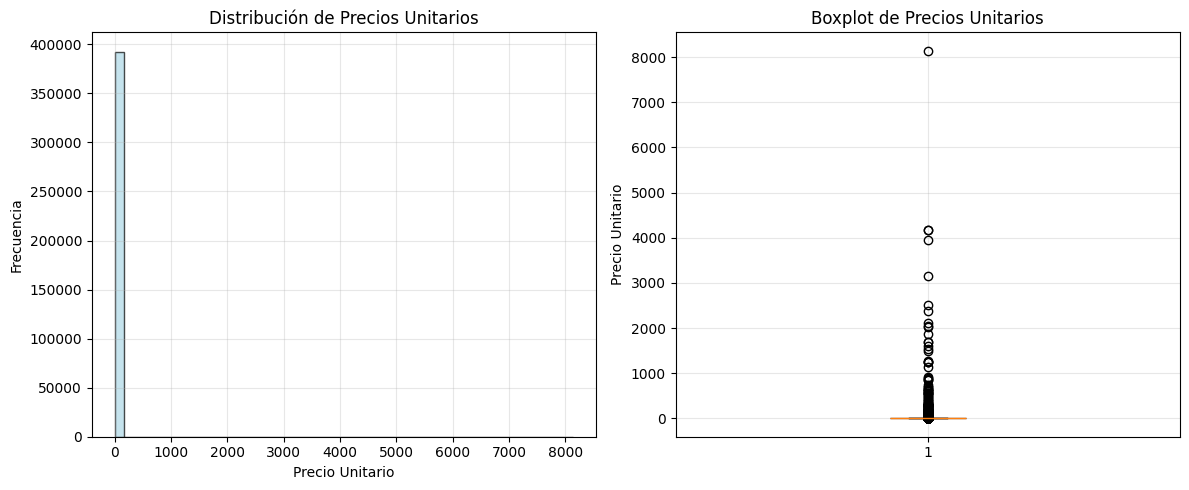

Estadísticas descriptivas de unitprice:
count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unitprice, dtype: float64


In [23]:
# Crear histograma y boxplot para la variable unitprice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma
ax1.hist(desc_df['unitprice'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
ax1.set_xlabel('Precio Unitario')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de Precios Unitarios')
ax1.grid(alpha=0.3)

# Boxplot
ax2.boxplot(desc_df['unitprice'], patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.7))
ax2.set_ylabel('Precio Unitario')
ax2.set_title('Boxplot de Precios Unitarios')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar estadísticas descriptivas básicas
print("Estadísticas descriptivas de unitprice:")
print(desc_df['unitprice'].describe())

In [24]:
# Mostrar las observaciones con unitprice mayores a 3000
obs_precios_altos = desc_df[desc_df['unitprice'] > 3000]
print("Observaciones con unitprice mayores a 3000:")
print(obs_precios_altos[['description', 'unitprice']])

# Para cada descripción encontrada, calcular el promedio de unitprice de ese producto en todo el dataset
print("\nPromedio de unitprice para cada producto con precios mayores a 3000:")
for desc in obs_precios_altos['description'].unique():
    promedio = desc_df[desc_df['description'] == desc]['unitprice'].mean()
    print(f"Producto: {desc} - Promedio unitprice: {promedio:.2f}")


Observaciones con unitprice mayores a 3000:
       description  unitprice
173382     POSTAGE    8142.75
374542      Manual    3155.95
406406      Manual    3949.32
422351      Manual    4161.06
422376      Manual    4161.06

Promedio de unitprice para cada producto con precios mayores a 3000:
Producto: POSTAGE - Promedio unitprice: 31.57
Producto: Manual - Promedio unitprice: 174.65


Teniendo en cuenta que los outliers de productos son Postage y Manual no tomaremos ninguna decision porque se realizara un analisis sobre estos posteriormente

Analisis sobre los productos

In [25]:
# Convertir todas las descripciones a minúsculas
desc_df_limpio['description'] = desc_df_limpio['description'].str.lower()

Creamos una nueva columna para saber la ganancia que genero esa venta

In [26]:
# Calcular la ganancia por producto con margen del 35%
margen = 0.35
desc_df_limpio['profit'] = desc_df_limpio['total_cost'] * margen

desc_df_limpio.describe()


,quantity,invoicedate,unitprice,customerid,total_cost,profit
count,392729.000000,392729,392729.000000,392729.000000,392729.000000,392729.000000
mean,12.726679,2011-07-10 19:14:59.043156992,3.125611,15287.744536,22.003864,7.701353
min,1.000000,2010-12-01 08:26:00,0.000000,12347.000000,0.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000,1.732500
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.390000,4.336500
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000,6.930000
max,4800.000000,2011-12-09 12:50:00,8142.750000,18287.000000,38970.000000,13639.500000
std,43.086667,NaN,22.240809,1713.563824,96.766053,33.868119


In [27]:
desc_df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392729 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392729 non-null  object        
 1   stockcode    392729 non-null  object        
 2   description  392729 non-null  object        
 3   quantity     392729 non-null  int64         
 4   invoicedate  392729 non-null  datetime64[ns]
 5   unitprice    392729 non-null  float64       
 6   customerid   392729 non-null  int64         
 7   country      392729 non-null  object        
 8   total_cost   392729 non-null  float64       
 9   profit       392729 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 33.0+ MB


### Entendimiento sobre los productos

Visualizamos los productos que mas se vendieron en UK y fuera de UK

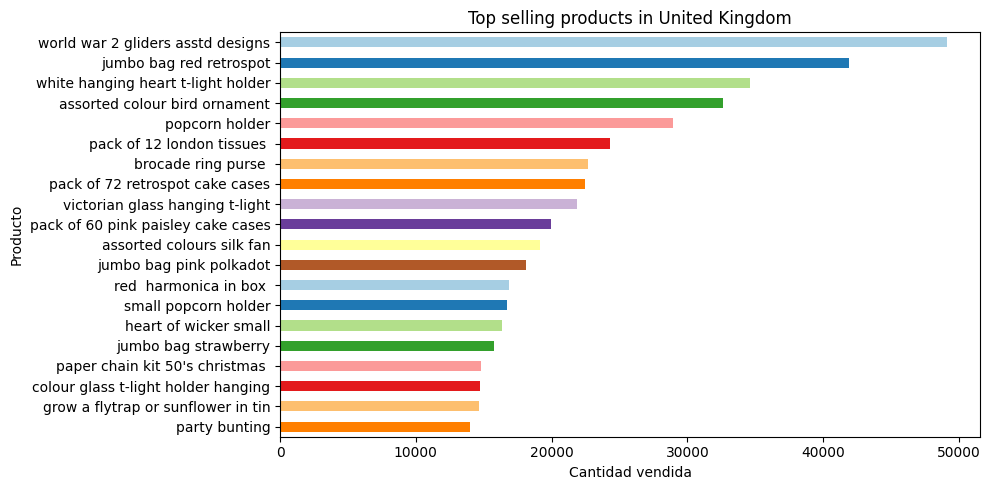

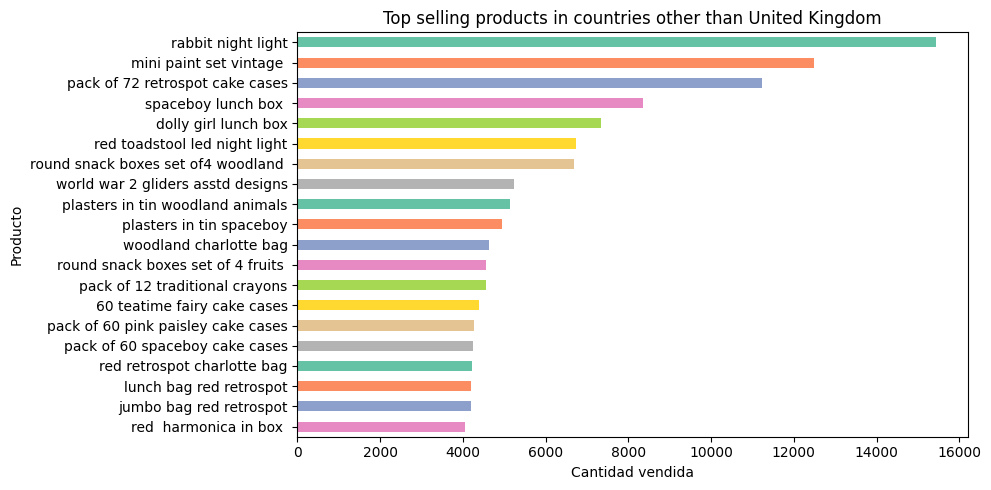

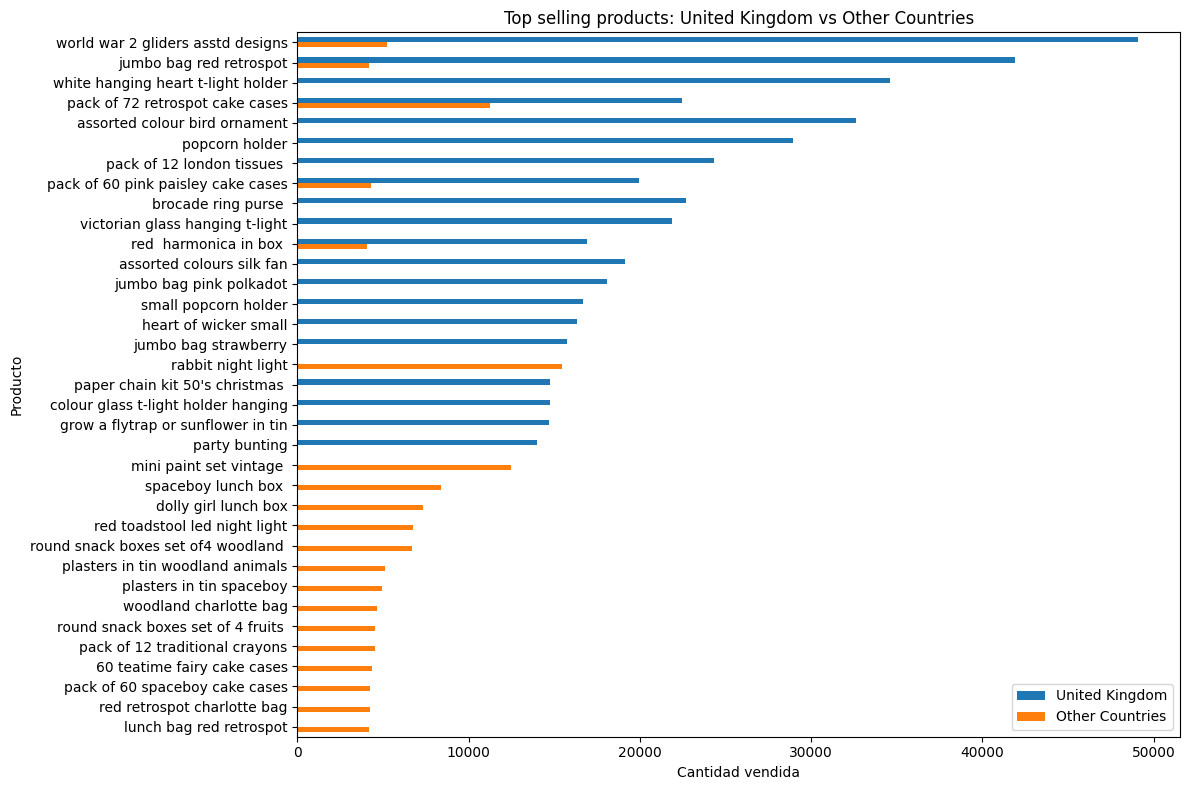

In [28]:
# Filtrar los datos para United Kingdom
uk_df = desc_df_limpio[desc_df_limpio['country'] == 'United Kingdom']

# Contar la cantidad total vendida por producto en United Kingdom
top_products_uk = uk_df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(20)

# Crear la gráfica de barras horizontales para United Kingdom
plt.figure(figsize=(10,5))
top_products_uk.plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Top selling products in United Kingdom')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Filtrar los datos para países distintos a United Kingdom
non_uk_df = desc_df_limpio[desc_df_limpio['country'] != 'United Kingdom']

# Contar la cantidad total vendida por producto en países distintos a United Kingdom
top_products_non_uk = non_uk_df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(20)

# Crear la gráfica de barras horizontales para países distintos a United Kingdom
plt.figure(figsize=(10,5))
top_products_non_uk.plot(kind='barh', color=plt.cm.Set2.colors)
plt.title('Top selling products in countries other than United Kingdom')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Comparar los top productos vendidos en UK vs fuera de UK

# Unir los dos top 20 para obtener el conjunto de productos a comparar
productos_union = set(top_products_uk.index).union(set(top_products_non_uk.index))

# Crear un DataFrame con ambos valores
comparacion_df = pd.DataFrame({
    'United Kingdom': top_products_uk.reindex(productos_union).fillna(0),
    'Other Countries': top_products_non_uk.reindex(productos_union).fillna(0)
})

# Ordenar por la suma total de ventas (para que los más vendidos estén arriba)
comparacion_df['Total'] = comparacion_df['United Kingdom'] + comparacion_df['Other Countries']
comparacion_df = comparacion_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Graficar
plt.figure(figsize=(12,8))
comparacion_df.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
plt.title('Top selling products: United Kingdom vs Other Countries')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

Hacemos lo mismo que antes pero por la ganancia

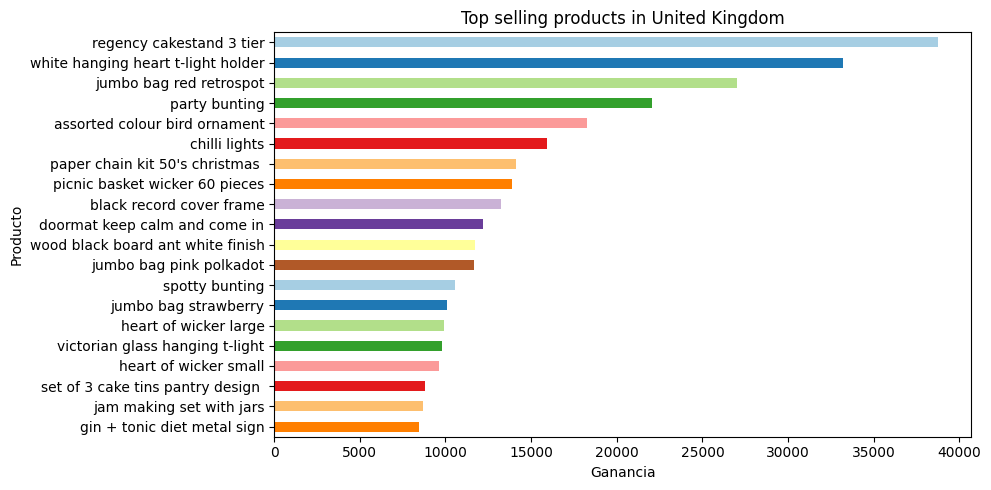

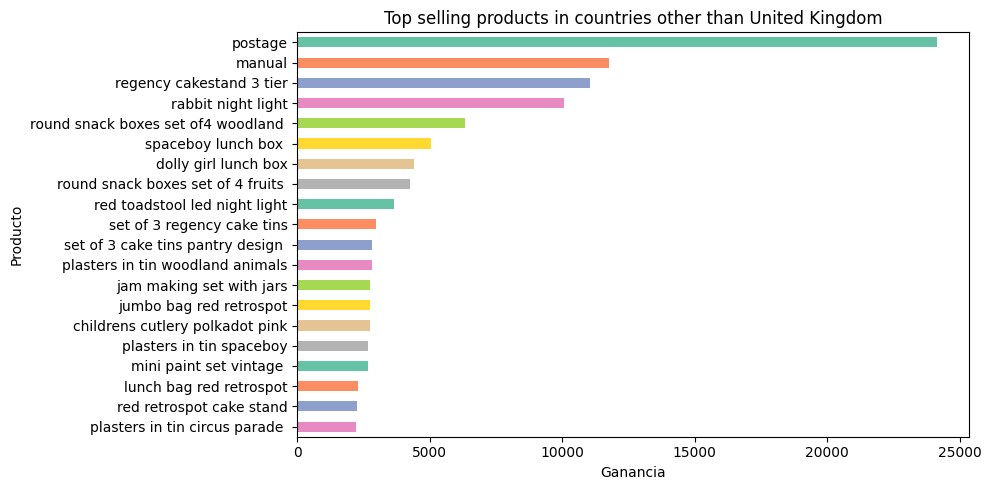

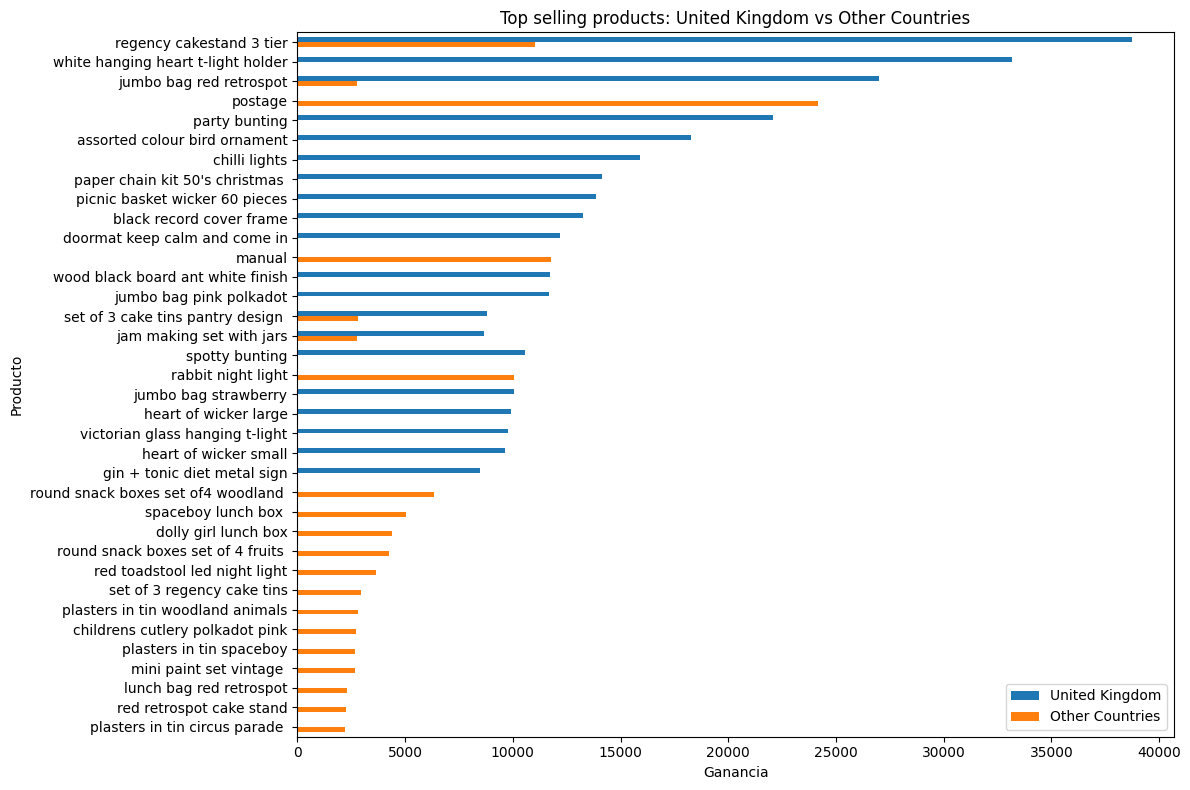

In [29]:
# Filtrar los datos para United Kingdom
uk_df = desc_df_limpio[desc_df_limpio['country'] == 'United Kingdom']

# Contar la cantidad total vendida por producto en United Kingdom
top_products_uk = uk_df.groupby('description')['profit'].sum().sort_values(ascending=False).head(20)

# Crear la gráfica de barras horizontales para United Kingdom
plt.figure(figsize=(10,5))
top_products_uk.plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Top selling products in United Kingdom')
plt.xlabel('Ganancia')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Filtrar los datos para países distintos a United Kingdom
non_uk_df = desc_df_limpio[desc_df_limpio['country'] != 'United Kingdom']

# Contar la cantidad total vendida por producto en países distintos a United Kingdom
top_products_non_uk = non_uk_df.groupby('description')['profit'].sum().sort_values(ascending=False).head(20)

# Crear la gráfica de barras horizontales para países distintos a United Kingdom
plt.figure(figsize=(10,5))
top_products_non_uk.plot(kind='barh', color=plt.cm.Set2.colors)
plt.title('Top selling products in countries other than United Kingdom')
plt.xlabel('Ganancia')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Comparar los top productos vendidos en UK vs fuera de UK

# Unir los dos top 20 para obtener el conjunto de productos a comparar
productos_union = set(top_products_uk.index).union(set(top_products_non_uk.index))

# Crear un DataFrame con ambos valores
comparacion_df = pd.DataFrame({
    'United Kingdom': top_products_uk.reindex(productos_union).fillna(0),
    'Other Countries': top_products_non_uk.reindex(productos_union).fillna(0)
})

# Ordenar por la suma total de ventas (para que los más vendidos estén arriba)
comparacion_df['Total'] = comparacion_df['United Kingdom'] + comparacion_df['Other Countries']
comparacion_df = comparacion_df.sort_values('Total', ascending=False).drop('Total', axis=1)

# Graficar
plt.figure(figsize=(12,8))
comparacion_df.plot(kind='barh', stacked=False, color=['#1f77b4', '#ff7f0e'], ax=plt.gca())
plt.title('Top selling products: United Kingdom vs Other Countries')
plt.xlabel('Ganancia')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

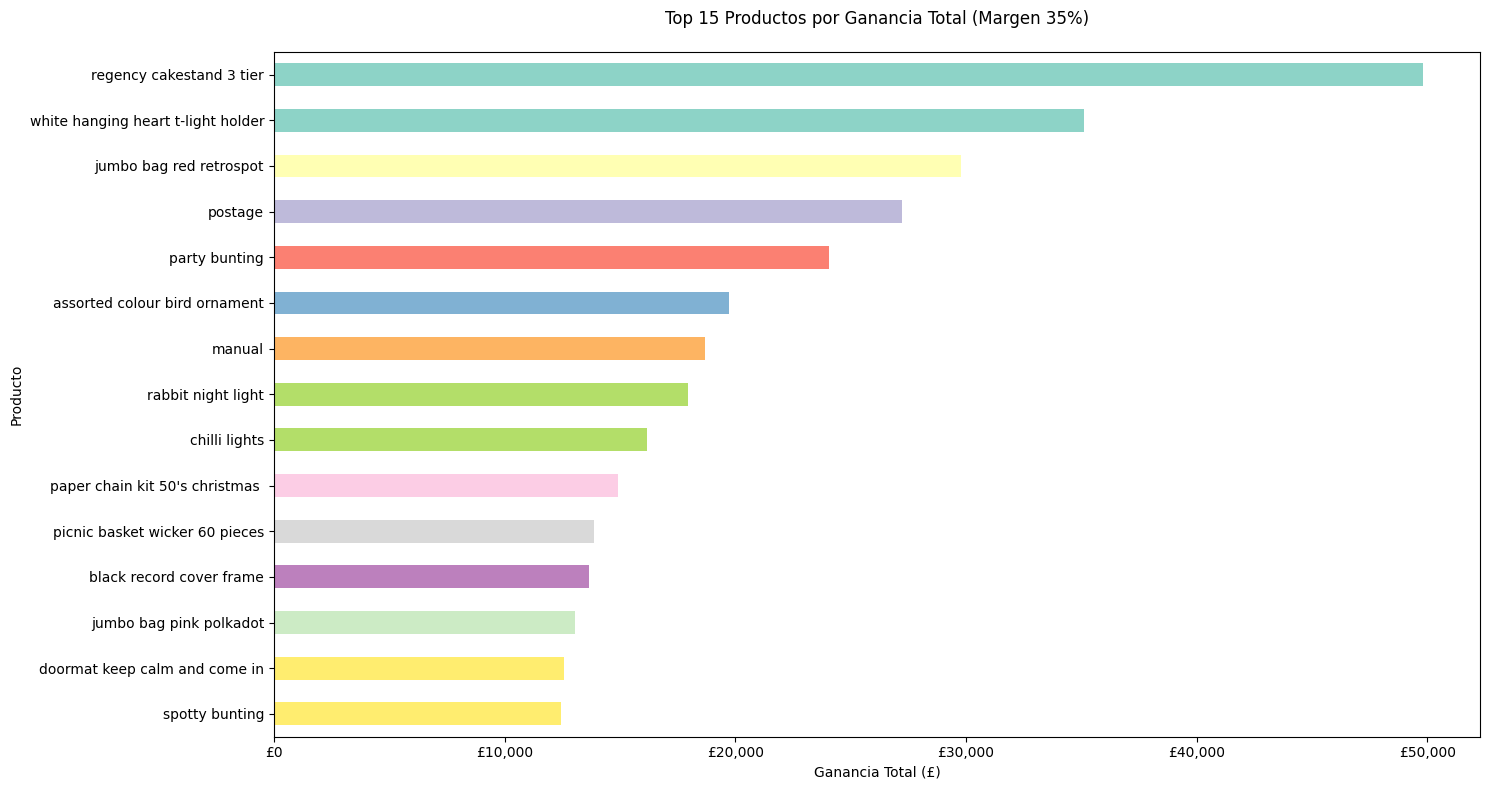

In [30]:
# Agrupar por producto y sumar las ganancias
top_15_ganancias = (
    desc_df_limpio.groupby('description')['profit']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

# Crear gráfico de barras horizontales
plt.figure(figsize=(15, 8))
ax = top_15_ganancias.plot(kind='barh', color=plt.cm.Set3(np.linspace(0, 1, 15)))

plt.title('Top 15 Productos por Ganancia Total (Margen 35%)', pad=20)
plt.xlabel('Ganancia Total (£)')
plt.ylabel('Producto')

# Formatear etiquetas del eje x para mostrar valores en libras
def format_func(value, tick_number):
    return f'£{value:,.0f}'
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

# Invertir el eje y para mostrar el mayor valor arriba
plt.gca().invert_yaxis()

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

Analizando las diferentes graficas podemos ver productos llamados "Postage" o "Manual" los cuales no son productos sino otro tipos de costes, como costos de envio que se podria verificar facilmente ya que son los mas relevantes teniendo en cuenta los paises fuera de UK

Creamos un excel para verificar los productos unicos y hacer un analisis sobre los productos que sean los mismos pero en su descripcion tienen una minima diferencia

In [31]:
# Obtener cantidad de productos únicos
n_productos = desc_df_limpio['description'].nunique()
print(f"Número total de productos únicos: {n_productos}")

# Obtener lista de productos únicos
productos_unicos = desc_df_limpio['description'].unique()

# Crear DataFrame con productos únicos
df_productos = pd.DataFrame(productos_unicos, columns=['Productos'])

# Guardar en Excel, manejando el error de permiso denegado
try:
    df_productos.to_excel('productos_unicos.xlsx', index=False)
    print("\nSe ha guardado la lista completa de productos en 'productos_unicos.xlsx'")
except PermissionError:
    print("\nNo se pudo guardar el archivo 'productos_unicos.xlsx' porque está abierto o no se tienen permisos. Por favor, cierre el archivo si está abierto e intente nuevamente.")

# Mostrar primeros 10 productos como ejemplo
print("\nPrimeros 10 productos como ejemplo:")
print(productos_unicos[:10])



Número total de productos únicos: 3876

Se ha guardado la lista completa de productos en 'productos_unicos.xlsx'

Primeros 10 productos como ejemplo:
['white hanging heart t-light holder' 'white metal lantern'
 'cream cupid hearts coat hanger' 'knitted union flag hot water bottle'
 'red woolly hottie white heart.' 'set 7 babushka nesting boxes'
 'glass star frosted t-light holder' 'hand warmer union jack'
 'hand warmer red polka dot' 'assorted colour bird ornament']


Buscamos estos productos para analizar si son relevantes para el analisis teniendo en cuenta un umbral del 95%

In [32]:
from difflib import SequenceMatcher
import pandas as pd

def encontrar_productos_similares(df, umbral=0.95):
    # Obtener lista de productos únicos
    productos = df['description'].unique()
    
    # Diccionario para almacenar grupos de productos similares
    grupos_similares = {}
    grupo_actual = 0
    productos_procesados = set()
    
    # Comparar cada producto con los demás
    for i, prod1 in enumerate(productos):
        if prod1 in productos_procesados:
            continue
            
        grupo = [prod1]
        productos_procesados.add(prod1)
        
        for prod2 in productos[i+1:]:
            if prod2 not in productos_procesados:
                # Calcular similitud
                similitud = SequenceMatcher(None, prod1.lower(), prod2.lower()).ratio()
                
                if similitud >= umbral:
                    grupo.append(prod2)
                    productos_procesados.add(prod2)
                    
        if len(grupo) > 1:
            grupos_similares[grupo_actual] = grupo
            grupo_actual += 1
    
    # Imprimir resultados con frecuencia de cada producto
    print(f"Se encontraron {len(grupos_similares)} grupos de productos similares:")
    for i, grupo in grupos_similares.items():
        print(f"\nGrupo {i+1}:")
        for prod in grupo:
            frecuencia = df[df['description'] == prod].shape[0]
            print(f"- {prod} (frecuencia: {frecuencia})")
            
    return grupos_similares, len(grupos_similares)

# Ejecutar la función
grupos_similares, n_grupos = encontrar_productos_similares(desc_df)
print(f"\nTotal de grupos de productos similares encontrados: {n_grupos}")

Se encontraron 91 grupos de productos similares:

Grupo 1:
-  SET 2 TEA TOWELS I LOVE LONDON  (frecuencia: 197)
- SET 2 TEA TOWELS I LOVE LONDON  (frecuencia: 181)

Grupo 2:
- FAIRY TALE COTTAGE NIGHTLIGHT (frecuencia: 69)
- FAIRY TALE COTTAGE NIGHT LIGHT (frecuencia: 82)

Grupo 3:
- BATHROOM METAL SIGN (frecuencia: 386)
- BATHROOM METAL SIGN  (frecuencia: 60)

Grupo 4:
- LUNCH BAG SUKI  DESIGN  (frecuencia: 148)
- LUNCH BAG SUKI DESIGN  (frecuencia: 915)

Grupo 5:
- PACK 3 BOXES BIRD PANNETONE  (frecuencia: 140)
- PACK 3 BOXES BIRD PANETTONE  (frecuencia: 14)

Grupo 6:
- PACK 3 BOXES CHRISTMAS PANNETONE (frecuencia: 114)
- PACK 3 BOXES CHRISTMAS PANETTONE (frecuencia: 12)

Grupo 7:
- BAG 500g SWIRLY MARBLES (frecuencia: 112)
- BAG 250g SWIRLY MARBLES (frecuencia: 198)

Grupo 8:
- CHILDREN'S SPACEBOY MUG (frecuencia: 179)
- CHILDRENS SPACEBOY MUG (frecuencia: 2)

Grupo 9:
- PINK  POLKADOT PLATE  (frecuencia: 131)
- PINK POLKADOT PLATE  (frecuencia: 18)

Grupo 10:
- CHARLIE + LOLA RED H

Analizamos las observaciones que no corresponden a productos

POSTAGE: costo de envío.

CARRIAGE: cargo por transporte.

BANK CHARGES: cargos bancarios.

MANUAL: manual de instrucciones o ítem auxiliar.


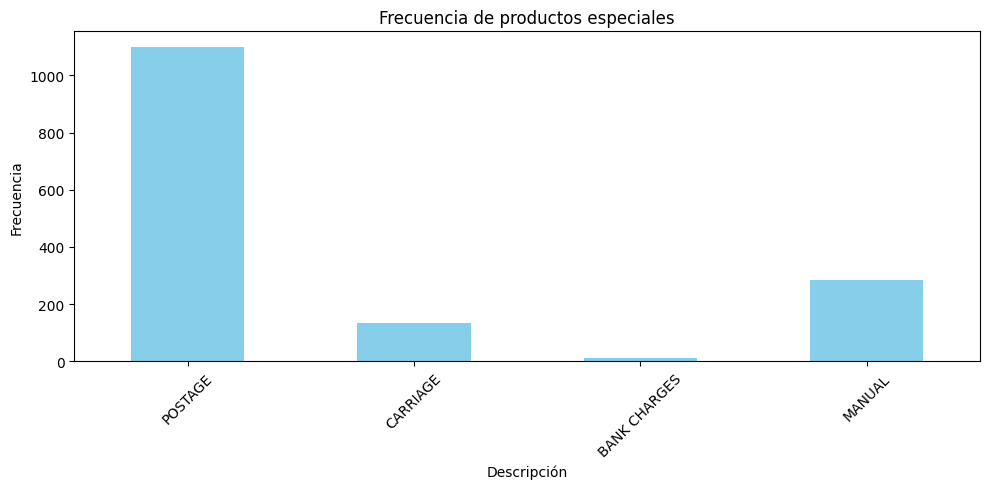

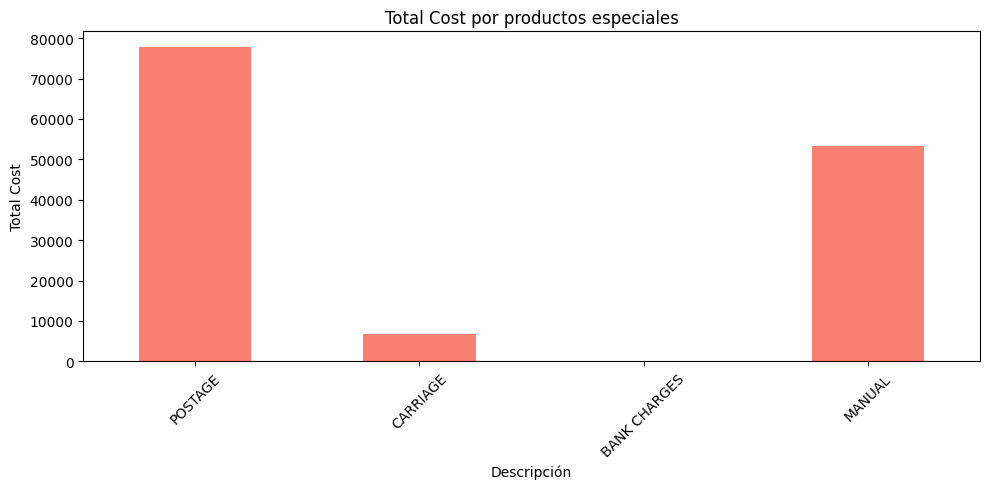

In [33]:
# Lista de descripciones a buscar (todas en mayúsculas)
descripciones_buscar = [
    "POSTAGE",
    "CARRIAGE",
    "BANK CHARGES",
    "MANUAL"
]

# Asegurarse que la columna 'description' esté en mayúsculas para la búsqueda
desc_df_limpio['description'] = desc_df_limpio['description'].str.upper()

# Filtrar el DataFrame para obtener solo los productos con esas descripciones
df_filtrado = desc_df_limpio[desc_df_limpio['description'].isin(descripciones_buscar)]

if not df_filtrado.empty:
    import matplotlib.pyplot as plt

    # Calcular la frecuencia de cada producto
    frecuencias = df_filtrado['description'].value_counts().reindex(descripciones_buscar, fill_value=0)

    # Calcular el total_cost por producto
    total_cost_por_producto = df_filtrado.groupby('description')['total_cost'].sum().reindex(descripciones_buscar, fill_value=0)

    # Gráfica de frecuencias
    plt.figure(figsize=(10,5))
    frecuencias.plot(kind='bar', color='skyblue')
    plt.title('Frecuencia de productos especiales')
    plt.xlabel('Descripción')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Gráfica de total_cost
    plt.figure(figsize=(10,5))
    total_cost_por_producto.plot(kind='bar', color='salmon')
    plt.title('Total Cost por productos especiales')
    plt.xlabel('Descripción')
    plt.ylabel('Total Cost')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron productos con las descripciones especificadas en el dataset.")



Limpiamos estas observaciones

In [34]:
# Eliminar las observaciones que tengan una descripción en la lista descripciones_buscar (ignorando mayúsculas/minúsculas)
desc_df_limpio = desc_df_limpio[~desc_df_limpio['description'].str.upper().isin(descripciones_buscar)]


### RFM


#### RECENCY
Tiempo desde la ultima venta

In [35]:
rfm = desc_df_limpio.copy()

rfm['invoicedate'].max()

Timestamp('2011-12-09 12:50:00')

In [36]:
current_date = dt.date(2011,12,9)

In [37]:
# creamos una columna con la fecha de compra
rfm['purchase_date'] = rfm.invoicedate.dt.date

In [38]:
rfm.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_cost,profit,purchase_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,5.355,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,7.119,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,7.700,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,7.119,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,7.119,2010-12-01


In [39]:

# Calculamos la fecha de la última compra por cada cliente
recency = rfm.groupby('description')['purchase_date'].max().reset_index()
recency.head()

,description,purchase_date
0,4 PURPLE FLOCK DINNER CANDLES,2011-12-08
1,50'S CHRISTMAS GIFT BAG LARGE,2011-12-09
2,DOLLY GIRL BEAKER,2011-12-08
3,I LOVE LONDON MINI BACKPACK,2011-12-08
4,I LOVE LONDON MINI RUCKSACK,2011-10-06


In [40]:
#
# Esta línea agrega una nueva columna llamada 'current_date' al DataFrame 'recency' 
recency = recency.assign(current_date = current_date)

recency.head()

,description,purchase_date,current_date
0,4 PURPLE FLOCK DINNER CANDLES,2011-12-08,2011-12-09
1,50'S CHRISTMAS GIFT BAG LARGE,2011-12-09,2011-12-09
2,DOLLY GIRL BEAKER,2011-12-08,2011-12-09
3,I LOVE LONDON MINI BACKPACK,2011-12-08,2011-12-09
4,I LOVE LONDON MINI RUCKSACK,2011-10-06,2011-12-09


In [41]:
# Calcula los días transcurridos desde la última compra hasta la fecha actual
recency['recency'] = recency.purchase_date.apply(lambda x: (current_date - x).days)

In [42]:
#Quitamos esas dos columnas inecesarias
recency.drop(['purchase_date','current_date'], axis=1, inplace=True)
recency.head()

,description,recency
0,4 PURPLE FLOCK DINNER CANDLES,1
1,50'S CHRISTMAS GIFT BAG LARGE,0
2,DOLLY GIRL BEAKER,1
3,I LOVE LONDON MINI BACKPACK,1
4,I LOVE LONDON MINI RUCKSACK,64


#### Frecuency
Total de productos vendidos

In [43]:
# Agrupa por cliente, cuenta el número único de facturas por cliente y renombra la columna resultante como 'frequency'
frequency = rfm.groupby('description').invoiceno.nunique().reset_index().rename(columns={'invoiceno':'frequency'})
frequency.head()

,description,frequency
0,4 PURPLE FLOCK DINNER CANDLES,36
1,50'S CHRISTMAS GIFT BAG LARGE,109
2,DOLLY GIRL BEAKER,133
3,I LOVE LONDON MINI BACKPACK,68
4,I LOVE LONDON MINI RUCKSACK,1


#### Monetary
Cantidad de dinero en ganancia que genero un producto

In [44]:
# Crear una columna separada para el Costo Total de la Unidad comprada
rfm['profit'] = rfm.quantity * rfm.unitprice

In [45]:
# Agrupa por cliente, suma el costo total gastado por cada cliente y renombra la columna resultante como 'monetary'
monetary = rfm.groupby('description').profit.sum().reset_index().rename(columns={'profit':'monetary'})
monetary.head()

,description,monetary
0,4 PURPLE FLOCK DINNER CANDLES,265.66
1,50'S CHRISTMAS GIFT BAG LARGE,2272.25
2,DOLLY GIRL BEAKER,2754.50
3,I LOVE LONDON MINI BACKPACK,1449.85
4,I LOVE LONDON MINI RUCKSACK,4.15


In [46]:
#Combinamos las 3 nuevas variables

temp_ = recency.merge(frequency, on='description')
rfm_table = temp_.merge(monetary, on='description')
rfm_table.set_index('description',inplace=True)

rfm_table.head()

,recency,frequency,monetary
description,,,
4 PURPLE FLOCK DINNER CANDLES,1,36,265.66
50'S CHRISTMAS GIFT BAG LARGE,0,109,2272.25
DOLLY GIRL BEAKER,1,133,2754.50
I LOVE LONDON MINI BACKPACK,1,68,1449.85
I LOVE LONDON MINI RUCKSACK,64,1,4.15


In [47]:
# Verificar si la diferencia de días entre la fecha de compra en el registro original es la misma que la mostrada en la tabla rfm
(current_date - rfm[rfm.description == rfm_table.index[0]].iloc[0].purchase_date).days == rfm_table.iloc[0,0]

np.False_

### Segmentos con RFM

Realizamos la segmentacion sobre los quantiles

In [48]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles


,recency,frequency,monetary
0.25,1.0,10.0,114.9625
0.50,4.0,43.0,581.0000
0.75,53.0,125.0,1972.5275


In [49]:
# Convirtamos la información de cuartiles en un diccionario para que se puedan recoger los puntos de corte.

quantiles=quantiles.to_dict()
quantiles

{'recency': {0.25: 1.0, 0.5: 4.0, 0.75: 53.0},
 'frequency': {0.25: 10.0, 0.5: 43.0, 0.75: 125.0},
 'monetary': {0.25: 114.9625, 0.5: 581.0, 0.75: 1972.5275000000001}}

In [50]:
# Argumentos (x = valor, p = recency, monetary_value, frequency, d = diccionario de cuartiles)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Argumentos (x = valor, p = recency, monetary_value, frequency, d = diccionario de cuartiles)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

Los puntajes van de 1 a 4, donde 4 es el mejor puntaje

#### Asignamos los segmentos

In [51]:
rfm_segment2 = rfm_table.copy()
rfm_segment2['r_quartile'] = rfm_segment2['recency'].apply(RScore, args=('recency',quantiles,))
rfm_segment2['f_quartile'] = rfm_segment2['frequency'].apply(FMScore, args=('frequency',quantiles,))
rfm_segment2['m_quartile'] = rfm_segment2['monetary'].apply(FMScore, args=('monetary',quantiles,))

In [52]:
rfm_segment2['RFMScore'] = rfm_segment2.r_quartile.map(str) \
                            + rfm_segment2.f_quartile.map(str) \
                            + rfm_segment2.m_quartile.map(str)
rfm_segment2.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
description,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1,36,265.66,4,2,2,422
50'S CHRISTMAS GIFT BAG LARGE,0,109,2272.25,4,3,4,434
DOLLY GIRL BEAKER,1,133,2754.50,4,4,4,444
I LOVE LONDON MINI BACKPACK,1,68,1449.85,4,3,3,433
I LOVE LONDON MINI RUCKSACK,64,1,4.15,1,1,1,111


In [53]:
# Reiniciar el índice para crear una columna customer_ID
rfm_segment2.reset_index(inplace=True)

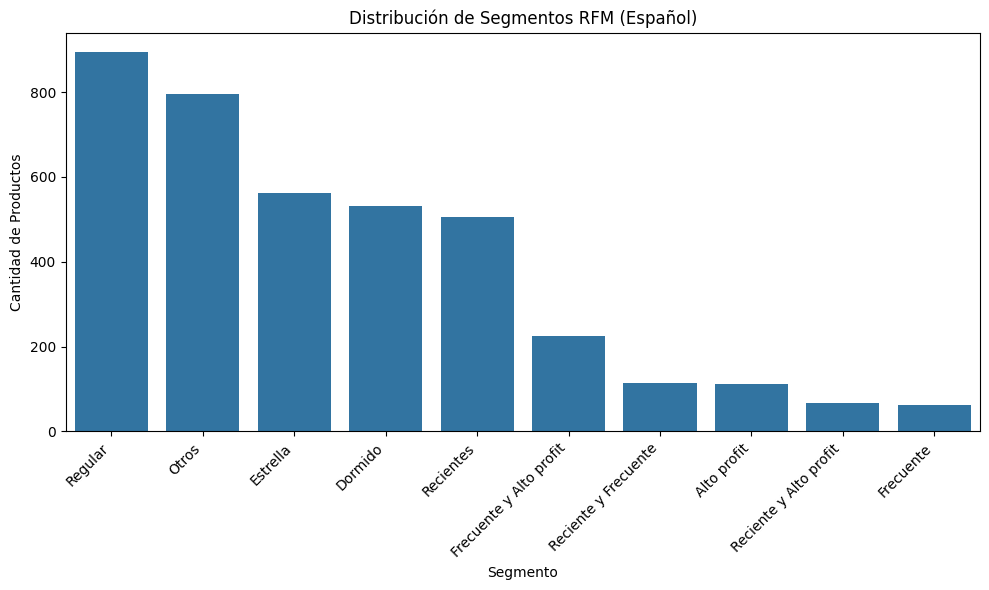


Porcentaje de productos por segmento (Español):
Regular: 23.11%
Otros: 20.53%
Estrella: 14.54%
Dormido: 13.71%
Recientes: 13.07%
Frecuente y Alto profit: 5.84%
Reciente y Frecuente: 2.94%
Alto profit: 2.89%
Reciente y Alto profit: 1.73%
Frecuente: 1.63%


In [54]:


# Nueva asignación de segmentos RFM con nombres en español y rangos para maximizar la cantidad de observaciones en cada segmento
# Usando rfm_segment2 en vez de rfm_segment

def asignar_segmento_es(row):
    r = row['r_quartile']
    f = row['f_quartile']
    m = row['m_quartile']
    # Estrella: Reciente, Frecuente, Alto valor
    if (r == 4) and (f == 4) and (m == 4):
        return 'Estrella'
    # Buenos: Reciente y frecuente
    elif (r == 4) and (f == 4):
        return 'Reciente y Frecuente'
    # Buenos: Reciente y alto profit
    elif (r == 4) and (m == 4):
        return 'Reciente y Alto profit'
    # Buenos: Frecuente y alto profit
    elif (f == 4) and (m == 4):
        return 'Frecuente y Alto profit'
    # Recientes: Reciente, pero frecuencia y valor medio
    elif (r == 4):
        return 'Recientes'
    # Buenos: Frecuente, pero no tan reciente
    elif (f == 4):
        return 'Frecuente'
    # Buenos: Alto valor, pero no tan reciente ni frecuente
    elif (m == 4):
        return 'Alto profit'
    # Dormidos: No reciente, baja frecuencia y bajo valor
    elif (r == 1) and (f == 1) and (m == 1):
        return 'Dormido'
    # En riesgo: No reciente, pero frecuencia o valor alto
    elif (r == 1) and ((f == 4) or (m == 4)):
        return 'Prometedor'
    # Prometedores: Reciente, pero baja frecuencia y valor
    elif (r == 4) and (f == 1) and (m == 1):
        return 'Recientes sin valor'
    # Regulares: valores intermedios
    elif (r >= 2) and (r <= 3) and (f >= 2) and (f <= 3) and (m >= 2) and (m <= 3):
        return 'Regular'
    # Otros: el resto
    else:
        return 'Otros'

# Aplicar la función a cada fila del DataFrame rfm_segment2
rfm_segment2['segmento'] = rfm_segment2.apply(asignar_segmento_es, axis=1)

# Visualizar la distribución de los nuevos segmentos en español
plt.figure(figsize=(10,6))
segmento_counts = rfm_segment2['segmento'].value_counts()
sns.barplot(x=segmento_counts.index, y=segmento_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Segmentos RFM (Español)')
plt.xlabel('Segmento')
plt.ylabel('Cantidad de Productos')
plt.tight_layout()
plt.show()

# Mostrar porcentajes de cada segmento en español
segmento_percentages = (segmento_counts / len(rfm_segment2) * 100).round(2)
print("\nPorcentaje de productos por segmento (Español):")
for segmento, percentage in segmento_percentages.items():
    print(f"{segmento}: {percentage}%")


In [55]:
rfm_segment2.head()

,description,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore,segmento
0,4 PURPLE FLOCK DINNER CANDLES,1,36,265.66,4,2,2,422,Recientes
1,50'S CHRISTMAS GIFT BAG LARGE,0,109,2272.25,4,3,4,434,Reciente y Alto profit
2,DOLLY GIRL BEAKER,1,133,2754.50,4,4,4,444,Estrella
3,I LOVE LONDON MINI BACKPACK,1,68,1449.85,4,3,3,433,Recientes
4,I LOVE LONDON MINI RUCKSACK,64,1,4.15,1,1,1,111,Dormido


### Clustering

#### Escalado del RFM

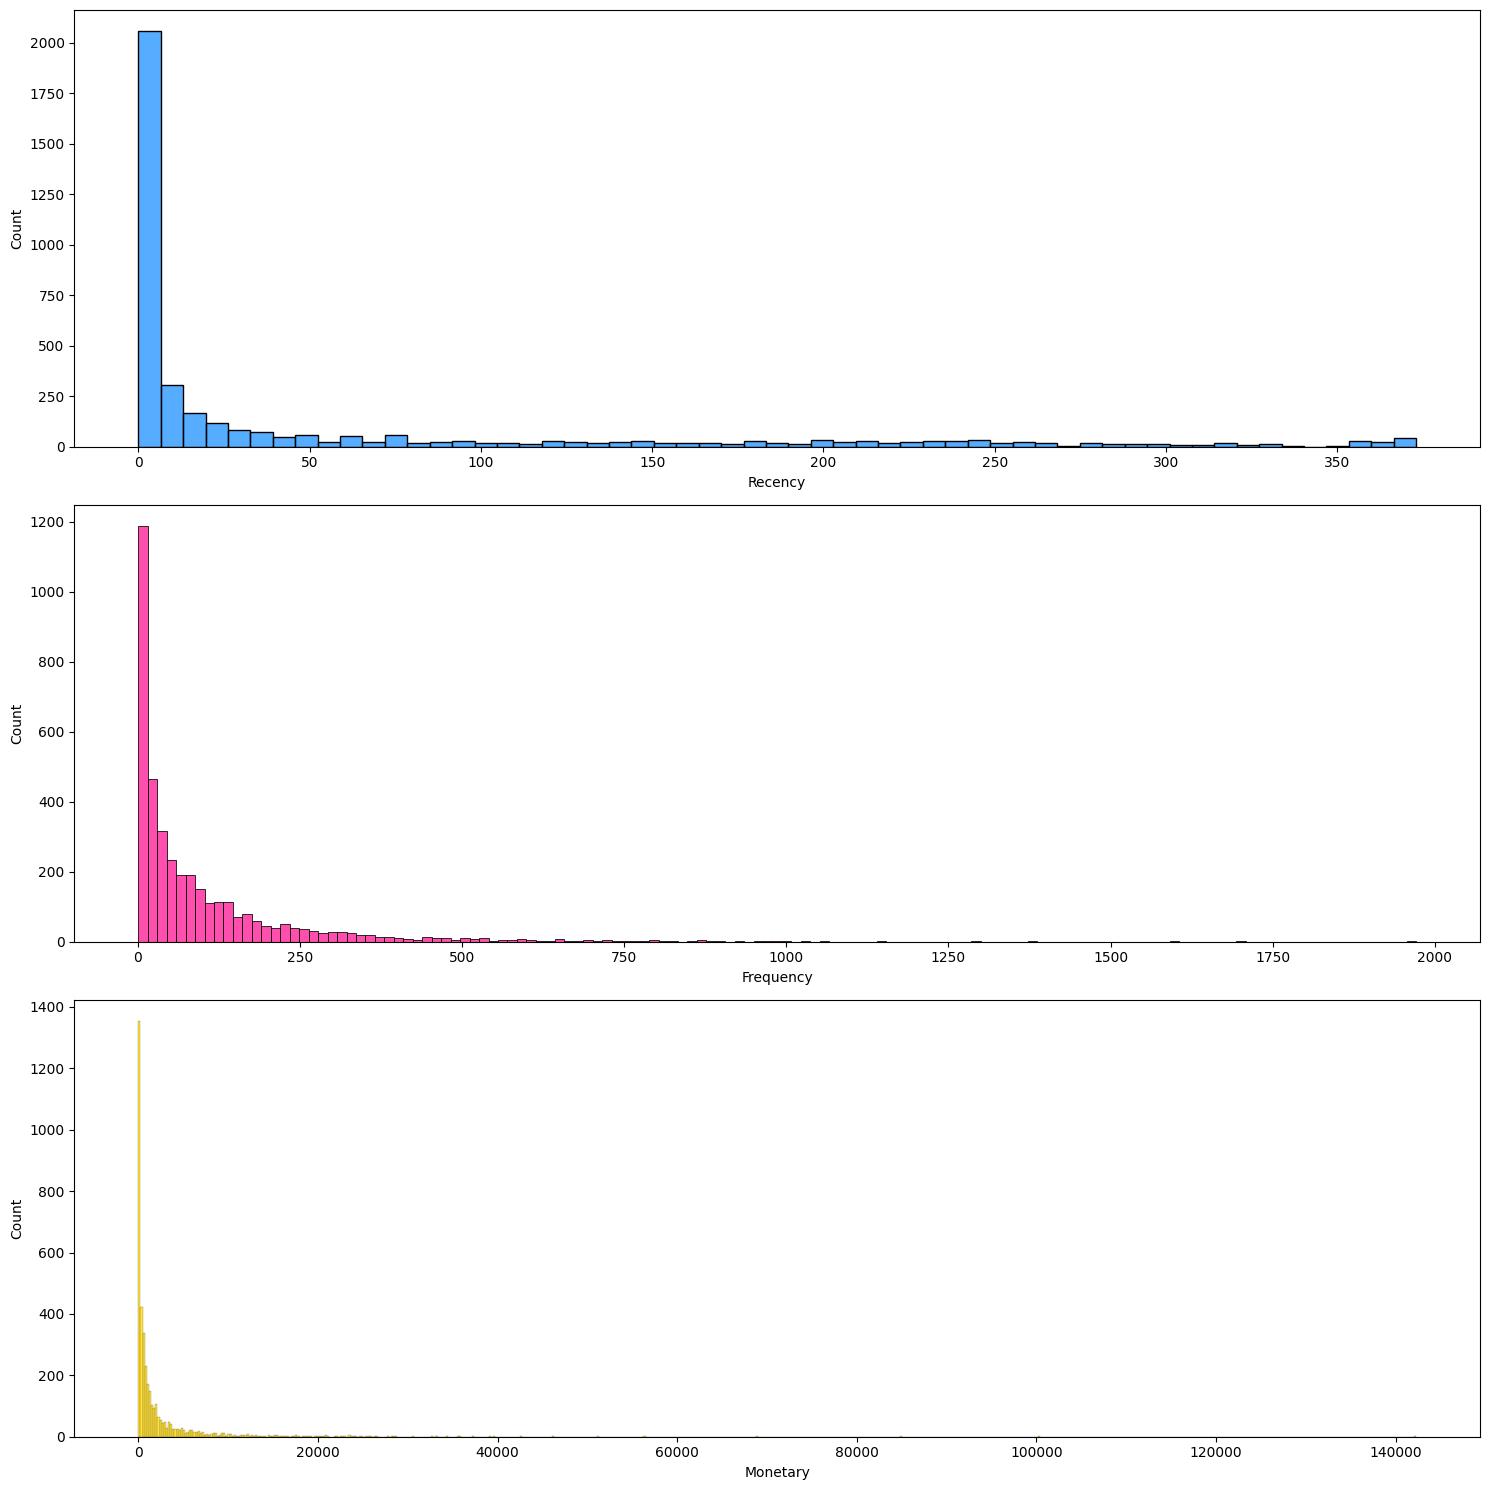

In [56]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.histplot(rfm_table['recency'], color="dodgerblue", ax=axes[0])
axes[0].set_xlabel('Recency')
sns.histplot(rfm_table['frequency'], color="deeppink", ax=axes[1])
axes[1].set_xlabel('Frequency')
sns.histplot(rfm_table['monetary'], color="gold", ax=axes[2])
axes[2].set_xlabel('Monetary')
plt.tight_layout()
plt.show()

Podemos observar que los datos estan sesgados

In [62]:
# Crear una copia de la tabla rfm
rfm_table_scaled = rfm_table.copy()

# Desplazar todos los valores de la columna sumando el valor absoluto del valor mínimo a cada valor, haciendo que todos sean positivos.
rfm_table_scaled.monetary = rfm_table_scaled.monetary + abs(rfm_table_scaled.monetary.min()) + 1
rfm_table_scaled.recency = rfm_table_scaled.recency + abs(rfm_table_scaled.recency.min()) + 1

# Verificar el resumen de los nuevos valores
rfm_table_scaled.describe()

,recency,frequency,monetary
count,3872.000000,3872.000000,3872.000000
mean,54.487345,99.759298,2197.149902
std,93.331128,153.697290,5404.652031
min,1.000000,1.000000,1.006000
25%,2.000000,10.000000,115.965500
50%,5.000000,43.000000,582.003000
75%,54.000000,125.000000,1973.530500
max,374.000000,1971.000000,142265.753000


StandardScaler es preferible porque centra los datos en cero y los escala a una desviación estándar de uno, mejorando el rendimiento de algoritmos sensibles a la escala y manteniendo la "forma de la distribución".

In [63]:
# Transformar los datos antes de aplicar K-Means clustering
from sklearn.preprocessing import StandardScaler

# Tomamos el logaritmo primero porque la normalización fuerza los datos para valores negativos
log_df = np.log(rfm_table_scaled)

# Normalizamos los datos para obtener promedios y medias uniformes en la distribución.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

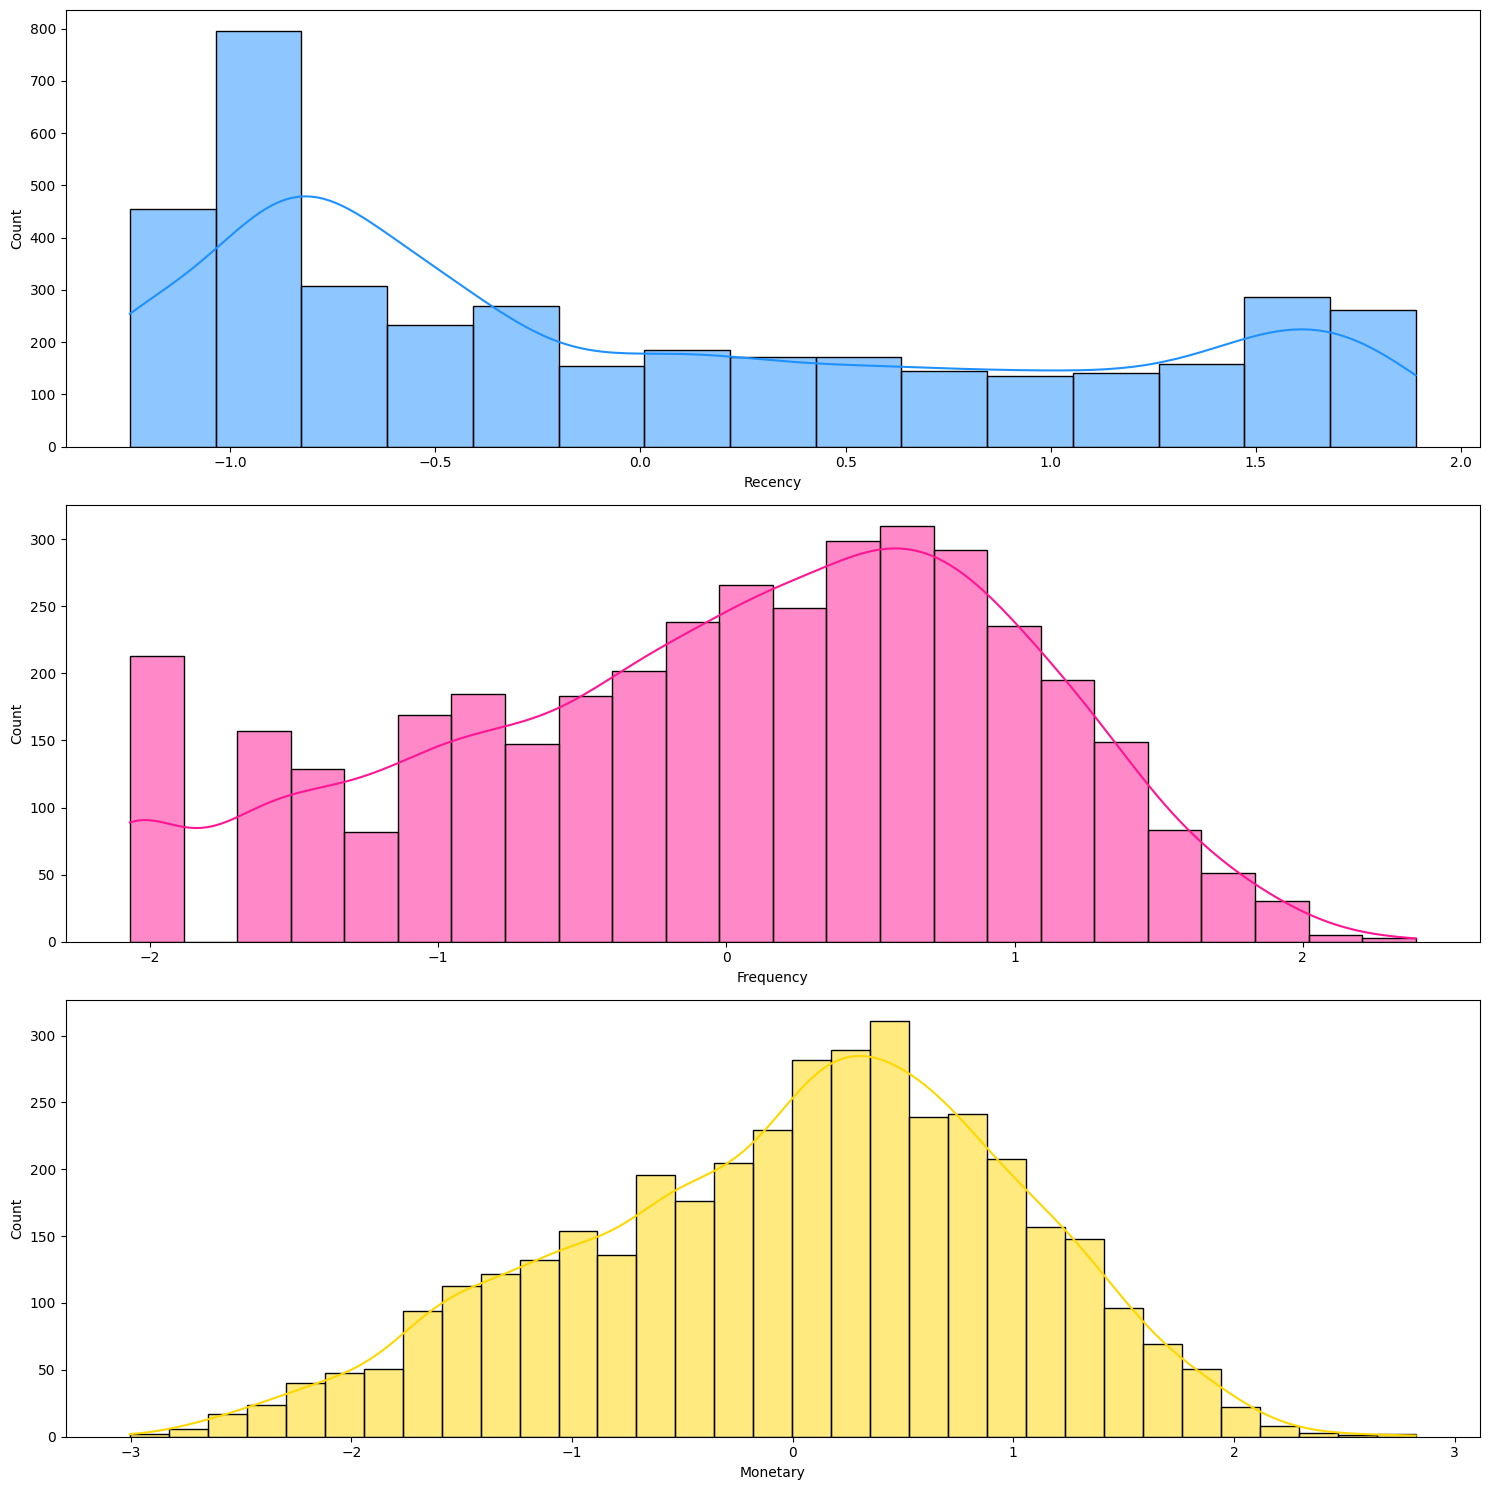

In [64]:


fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.histplot(normal_df.recency, color="dodgerblue", ax=axes[0], kde=True)
axes[0].set_xlabel('Recency')
sns.histplot(normal_df.frequency, color="deeppink", ax=axes[1], kde=True)
axes[1].set_xlabel('Frequency')
sns.histplot(normal_df.monetary, color="gold", ax=axes[2], kde=True)
axes[2].set_xlabel('Monetary')
plt.tight_layout()
plt.show()

In [65]:
normal_df.head()

,recency,frequency,monetary
description,,,
4 PURPLE FLOCK DINNER CANDLES,-0.877699,0.038194,-0.261773
50'S CHRISTMAS GIFT BAG LARGE,-1.244365,0.689559,0.791168
DOLLY GIRL BEAKER,-0.877699,0.806564,0.885697
I LOVE LONDON MINI BACKPACK,-0.877699,0.412133,0.570525
I LOVE LONDON MINI RUCKSACK,0.963831,-2.068790,-2.200815


#### Métricas internas

k=2 | WCSS=4590.45 | Silhouette=0.5100 | Calinski-Harabasz=5923.04 | Davies-Bouldin=0.7276
k=3 | WCSS=3192.51 | Silhouette=0.3906 | Calinski-Harabasz=5104.45 | Davies-Bouldin=0.9258
k=4 | WCSS=2452.36 | Silhouette=0.3880 | Calinski-Harabasz=4818.04 | Davies-Bouldin=0.8974
k=5 | WCSS=2004.80 | Silhouette=0.3611 | Calinski-Harabasz=4634.90 | Davies-Bouldin=0.8956
k=6 | WCSS=1673.08 | Silhouette=0.3485 | Calinski-Harabasz=4595.07 | Davies-Bouldin=0.8973
k=7 | WCSS=1457.70 | Silhouette=0.3426 | Calinski-Harabasz=4489.08 | Davies-Bouldin=0.8915
k=8 | WCSS=1329.98 | Silhouette=0.3150 | Calinski-Harabasz=4269.19 | Davies-Bouldin=0.9564
k=9 | WCSS=1211.26 | Silhouette=0.3159 | Calinski-Harabasz=4147.98 | Davies-Bouldin=0.9687
k=10 | WCSS=1112.89 | Silhouette=0.3139 | Calinski-Harabasz=4050.03 | Davies-Bouldin=0.9494


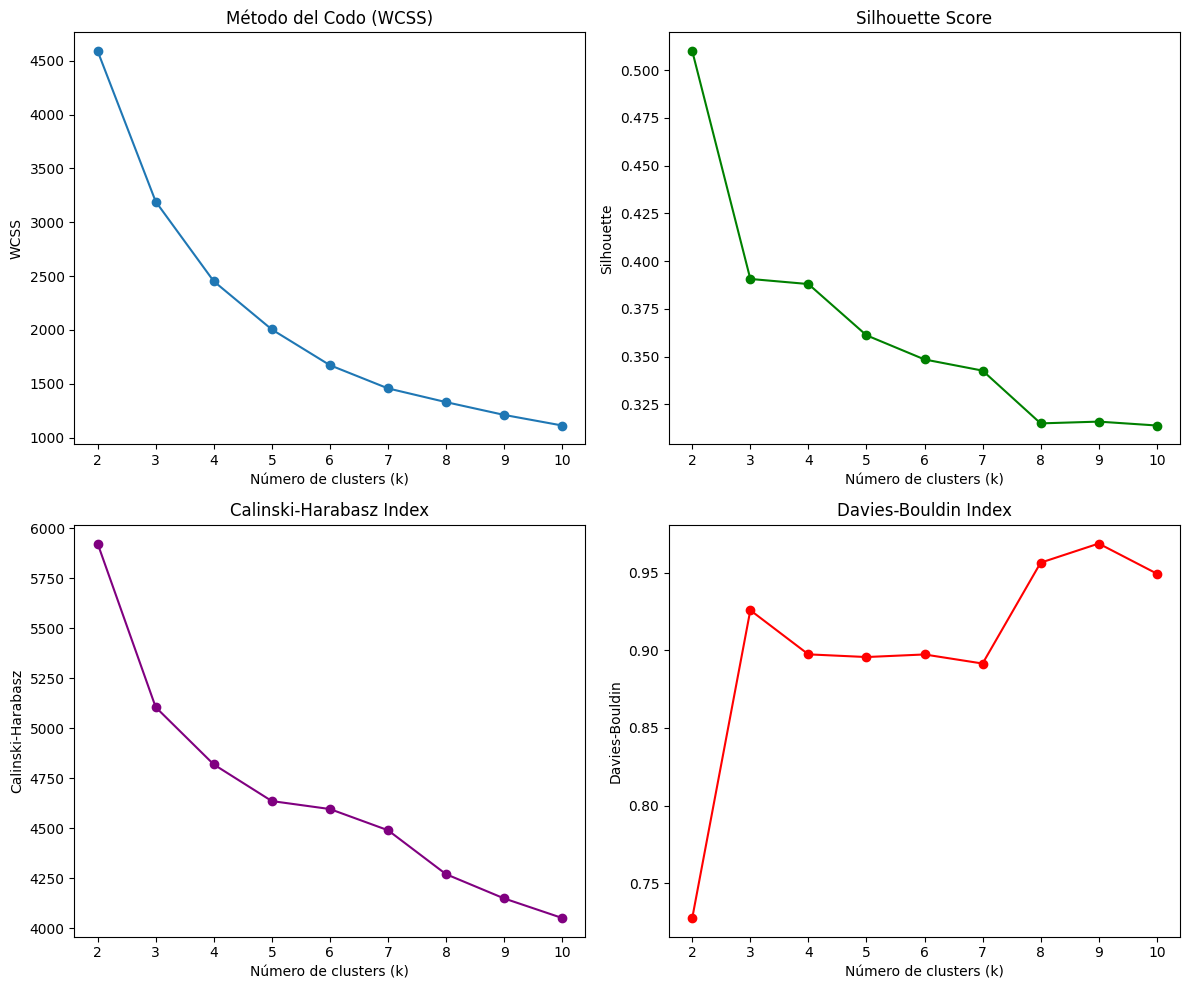

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Tu dataset escalado
X = normal_df.values  # O como lo tengas llamado

# Rango de k
k_values = range(2, 11)

wcss = []
silhouette_scores = []
calinski_scores = []
davies_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)

    wcss.append(kmeans.inertia_)  # Within-Cluster Sum of Squares (WCSS)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))
    davies_scores.append(davies_bouldin_score(X, labels))

    print(f"k={k} | WCSS={wcss[-1]:.2f} | Silhouette={silhouette_scores[-1]:.4f} | "
          f"Calinski-Harabasz={calinski_scores[-1]:.2f} | Davies-Bouldin={davies_scores[-1]:.4f}")

# --- Graficar ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Elbow (WCSS)
axes[0, 0].plot(k_values, wcss, marker='o')
axes[0, 0].set_title('Método del Codo (WCSS)')
axes[0, 0].set_xlabel('Número de clusters (k)')
axes[0, 0].set_ylabel('WCSS')

# Silhouette
axes[0, 1].plot(k_values, silhouette_scores, marker='o', color='green')
axes[0, 1].set_title('Silhouette Score')
axes[0, 1].set_xlabel('Número de clusters (k)')
axes[0, 1].set_ylabel('Silhouette')

# Calinski-Harabasz
axes[1, 0].plot(k_values, calinski_scores, marker='o', color='purple')
axes[1, 0].set_title('Calinski-Harabasz Index')
axes[1, 0].set_xlabel('Número de clusters (k)')
axes[1, 0].set_ylabel('Calinski-Harabasz')

# Davies-Bouldin
axes[1, 1].plot(k_values, davies_scores, marker='o', color='red')
axes[1, 1].set_title('Davies-Bouldin Index')
axes[1, 1].set_xlabel('Número de clusters (k)')
axes[1, 1].set_ylabel('Davies-Bouldin')

plt.tight_layout()
plt.show()

Aunque k=2 es óptimo estadísticamente (mejores valores en Silhouette, Calinski-Harabasz y Davies-Bouldin), desde un punto de vista de marketing y segmentación, k=3 ofrece un mejor equilibrio entre simplicidad y diferenciación de grupos

In [67]:
# Crear una copia de normal_df sin el outlier
normal_df_clean = normal_df.copy()


C:\Users\Matias\AppData\Local\Temp\ipykernel_2392\1787578324.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


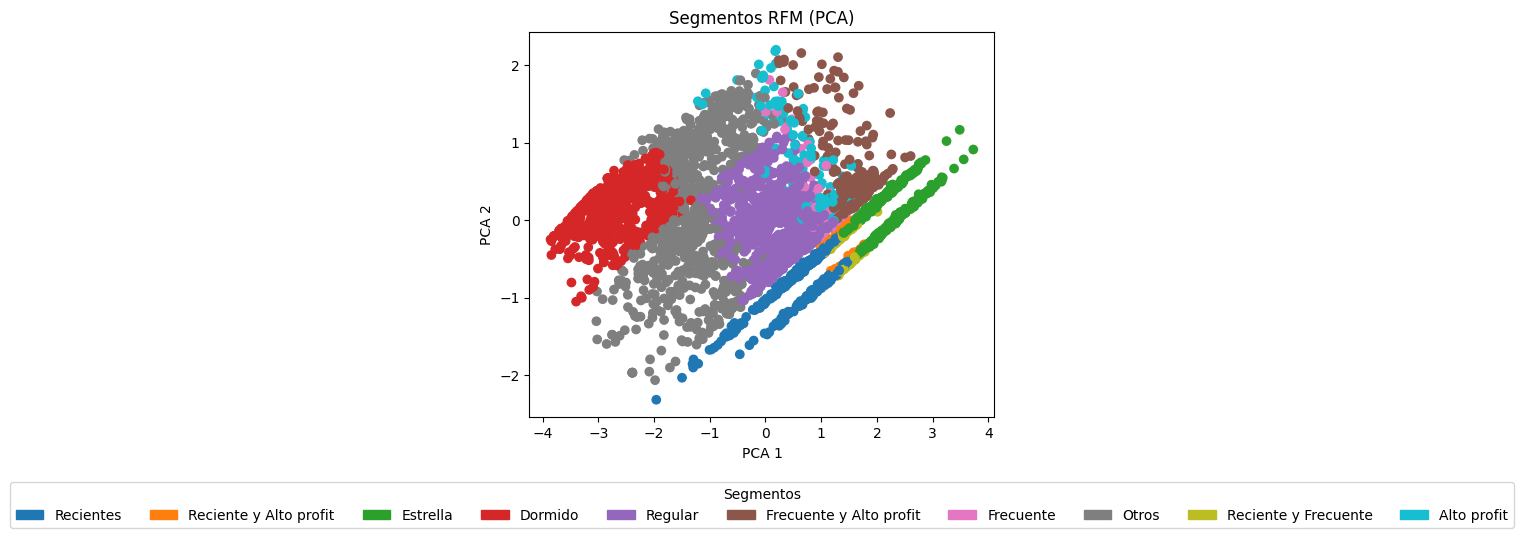

In [70]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualizar distribución de segmentos RFM
plt.figure(figsize=(6, 5))
# Crear un mapa de colores para cada segmento único
segment_map = {seg: i for i, seg in enumerate(rfm_segment2.segmento.unique())}
segment_colors = [segment_map[x] for x in rfm_segment2.segmento[:len(X_pca)]]
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=segment_colors, cmap='tab10')
plt.title('Segmentos RFM (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
unique_segments = rfm_segment2.segmento.unique()
handles = [mpatches.Patch(color=scatter.cmap(scatter.norm(segment_map[seg])), label=seg)
           for seg in unique_segments]
plt.legend(handles=handles, title="Segmentos", bbox_to_anchor=(0.5, -0.15),
          loc='upper center', ncol=len(unique_segments))
plt.tight_layout()
plt.show()
 


#### K-means

Adjusted Rand Index - k=2 : 0.20590529291745704
Jaccard Score - k=2: 0.0002495321272613849
Adjusted Rand Index - k=3 : 0.3224392839637087
Jaccard Score - k=3: 0.0037578288100208767
Adjusted Rand Index - k=4 : 0.3263126788231343
Jaccard Score - k=4: 0.004636946702864261
Adjusted Rand Index - k=5 : 0.38669323443944464
Jaccard Score - k=5: 0.001774956580523332


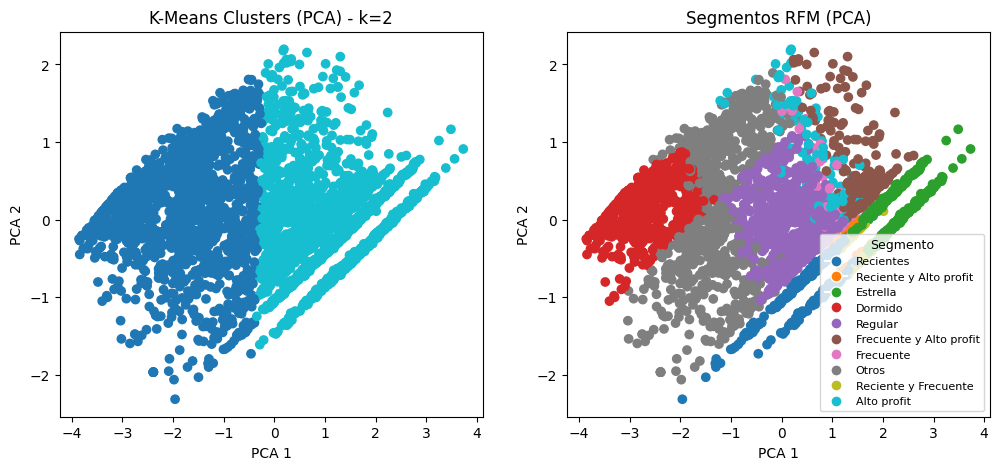

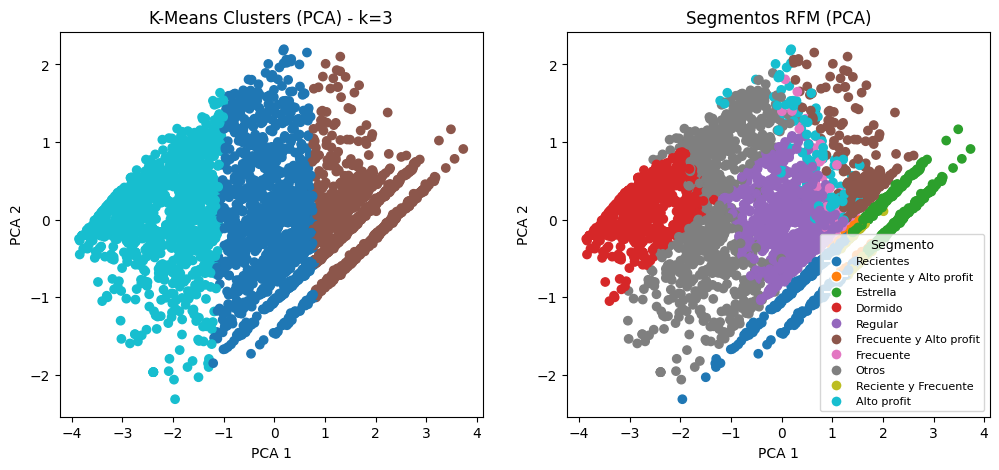

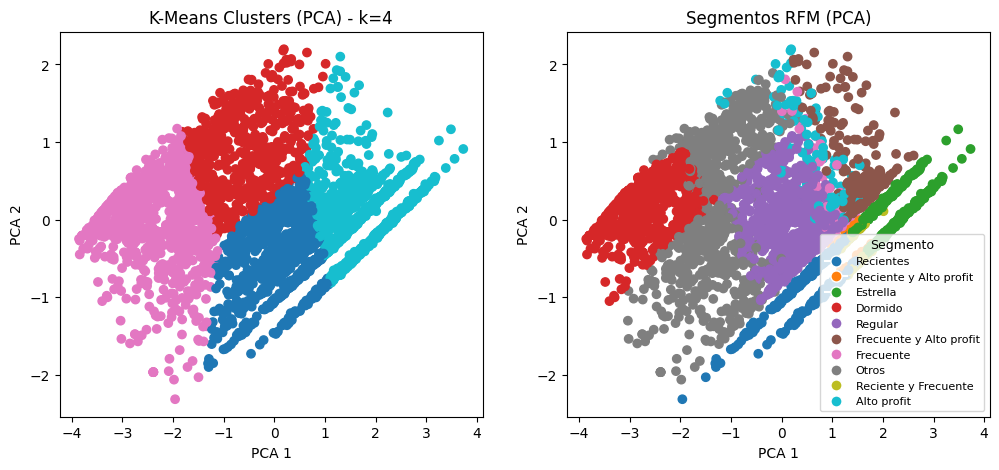

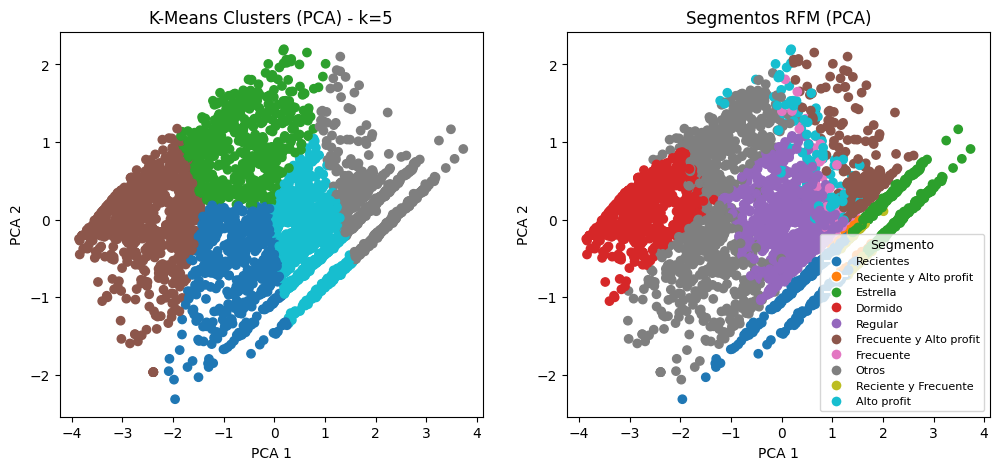

In [71]:
from sklearn.metrics import adjusted_rand_score, jaccard_score
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans_labels_array = []

# Probamos el número de clusters de 2 a 5
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=300, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)
    kmeans_labels_array.append(kmeans_labels)
    score = silhouette_score(X, kmeans_labels)
    
    le = LabelEncoder()
    true_labels = le.fit_transform(rfm_segment2['segmento'])

    # predicted_labels: los clusters que generó tu algoritmo
    ari = adjusted_rand_score(true_labels, kmeans_labels)
    jac = jaccard_score(true_labels, kmeans_labels, average='macro')

    print(f"Adjusted Rand Index - k={k} :", ari)
    print(f"Jaccard Score - k={k}:", jac)

    # 1. K-Means y Segmentos RFM en la misma imagen, en la misma fila, sin leyendas
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfica de K-Means
    scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10')
    axes[0].set_title(f'K-Means Clusters (PCA) - k={k}')
    axes[0].set_xlabel('PCA 1')
    axes[0].set_ylabel('PCA 2')
    # Sin leyenda

    # Gráfica de Segmentos RFM
    segment_map = {seg: i for i, seg in enumerate(rfm_segment2.segmento.unique())}
    segment_colors = [segment_map[x] for x in rfm_segment2.segmento[:len(X_pca)]]
    scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=segment_colors, cmap='tab10')
    axes[1].set_title('Segmentos RFM (PCA)')
    axes[1].set_xlabel('PCA 1')
    axes[1].set_ylabel('PCA 2')

    # Agregar leyenda solo para los segmentos RFM, más pequeña y en la parte inferior derecha
    from matplotlib.lines import Line2D
    handles = [Line2D([0], [0], marker='o', color='w', label=seg,
                      markerfacecolor=plt.cm.tab10(i), markersize=8)
               for seg, i in segment_map.items()]
    axes[1].legend(handles=handles, title="Segmento", loc='lower right', fontsize=8, title_fontsize=9)

#### Agglomerative Clustering

Adjusted Rand Index - k=2 : 0.16121223356248518
Jaccard Score - k=2: 0.05033014123783377
Adjusted Rand Index - k=3 : 0.29909318089365505
Jaccard Score - k=3: 0.09079967072741343
Adjusted Rand Index - k=4 : 0.29381721052982773
Jaccard Score - k=4: 0.04294275333309615
Adjusted Rand Index - k=5 : 0.2806339622702536
Jaccard Score - k=5: 0.00588943960917305


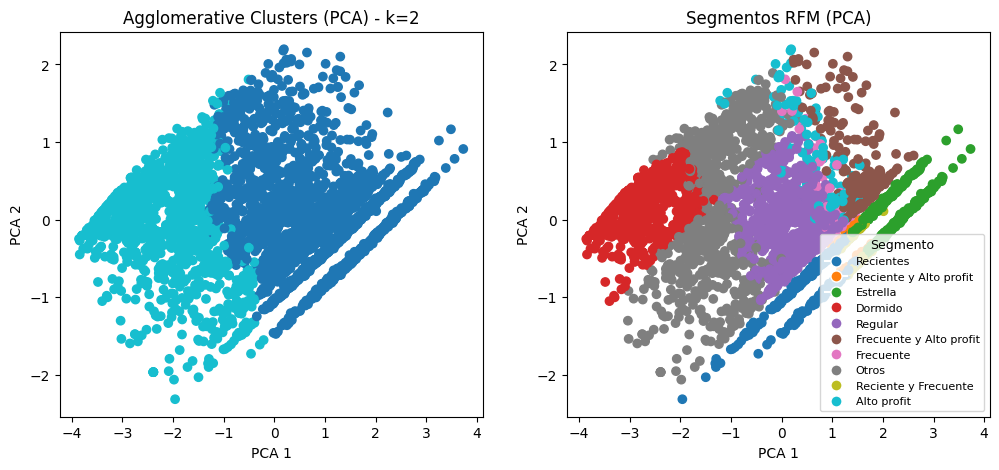

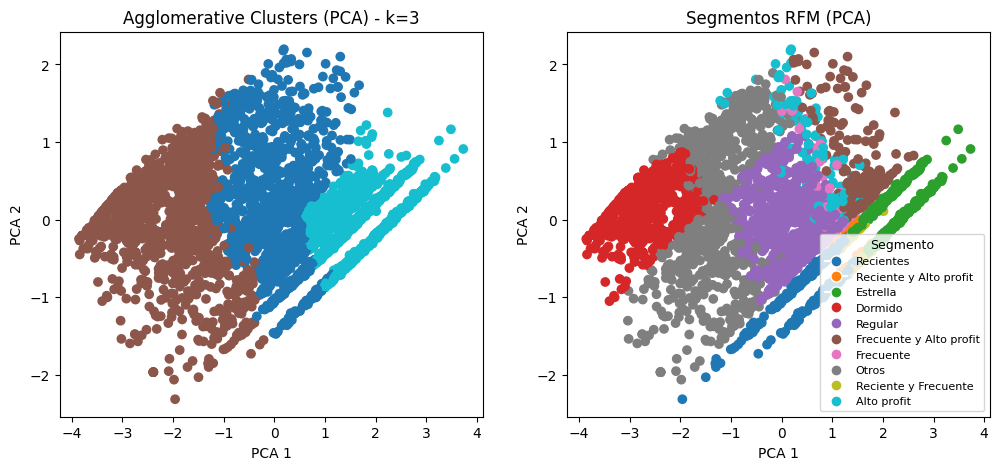

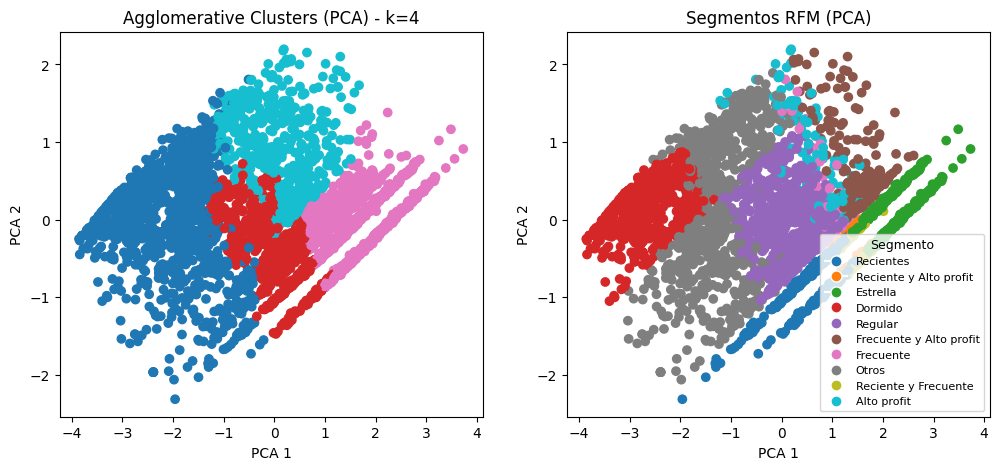

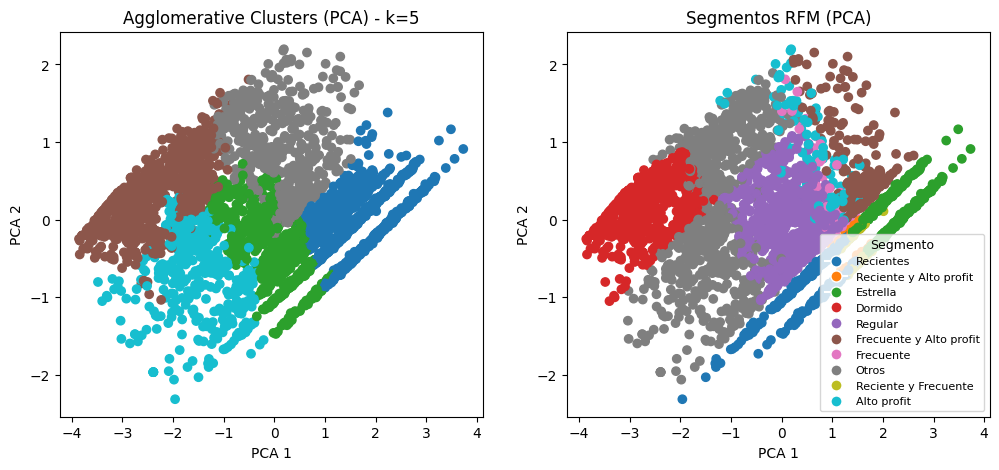

In [72]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, jaccard_score
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Probamos el número de clusters de 2 a 5 usando Agglomerative
for k in range(2, 6):
    agglo = AgglomerativeClustering(n_clusters=k)
    agg_labels = agglo.fit_predict(X)
    score = silhouette_score(X, agg_labels)

    le = LabelEncoder()
    true_labels = le.fit_transform(rfm_segment2['segmento'])

    # predicted_labels: los clusters que generó tu algoritmo
    ari = adjusted_rand_score(true_labels, agg_labels)
    jac = jaccard_score(true_labels, agg_labels, average='macro')

    print(f"Adjusted Rand Index - k={k} :", ari)
    print(f"Jaccard Score - k={k}:", jac)

    # 1. Agglomerative y Segmentos RFM en la misma imagen, en la misma fila, sin leyendas
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfica de Agglomerative
    scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='tab10')
    axes[0].set_title(f'Agglomerative Clusters (PCA) - k={k}')
    axes[0].set_xlabel('PCA 1')
    axes[0].set_ylabel('PCA 2')
    # Sin leyenda

    # Gráfica de Segmentos RFM
    segment_map = {seg: i for i, seg in enumerate(rfm_segment2.segmento.unique())}
    segment_colors = [segment_map[x] for x in rfm_segment2.segmento[:len(X_pca)]]
    scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=segment_colors, cmap='tab10')
    axes[1].set_title('Segmentos RFM (PCA)')
    axes[1].set_xlabel('PCA 1')
    axes[1].set_ylabel('PCA 2')

    # Agregar leyenda solo para los segmentos RFM, más pequeña y en la parte inferior derecha
    from matplotlib.lines import Line2D
    handles = [Line2D([0], [0], marker='o', color='w', label=seg,
                      markerfacecolor=plt.cm.tab10(i), markersize=8)
               for seg, i in segment_map.items()]
    axes[1].legend(handles=handles, title="Segmento", loc='lower right', fontsize=8, title_fontsize=9)

#### GaussianMixture

Adjusted Rand Index - k=2 : 0.17134973790817323
Jaccard Score - k=2: 0.004196978175713487
Adjusted Rand Index - k=3 : 0.23756638806362532
Jaccard Score - k=3: 0.005326331582895724
Adjusted Rand Index - k=4 : 0.21385317547949118
Jaccard Score - k=4: 0.04990182814271152
Adjusted Rand Index - k=5 : 0.30772903681625424
Jaccard Score - k=5: 0.016782458791179927


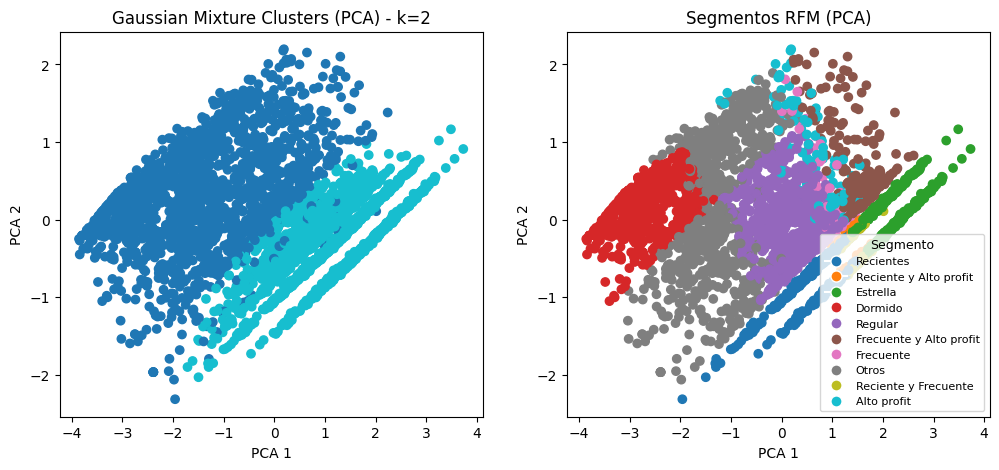

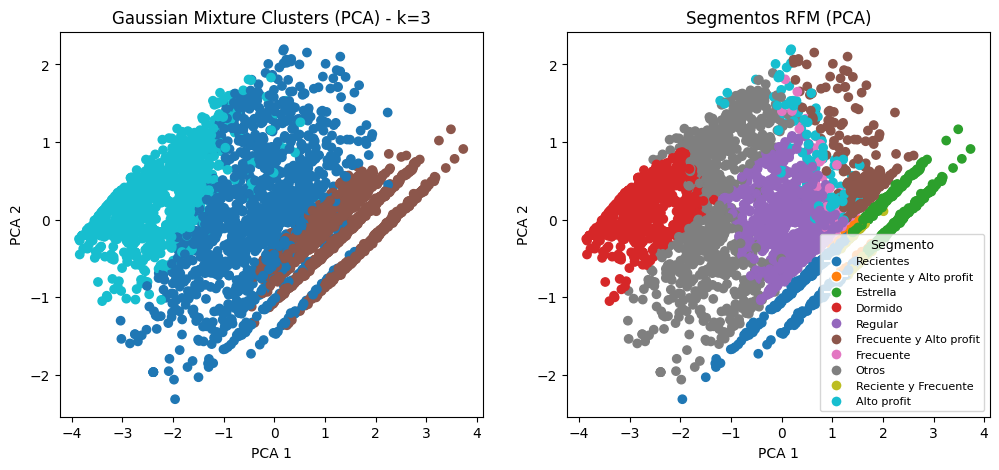

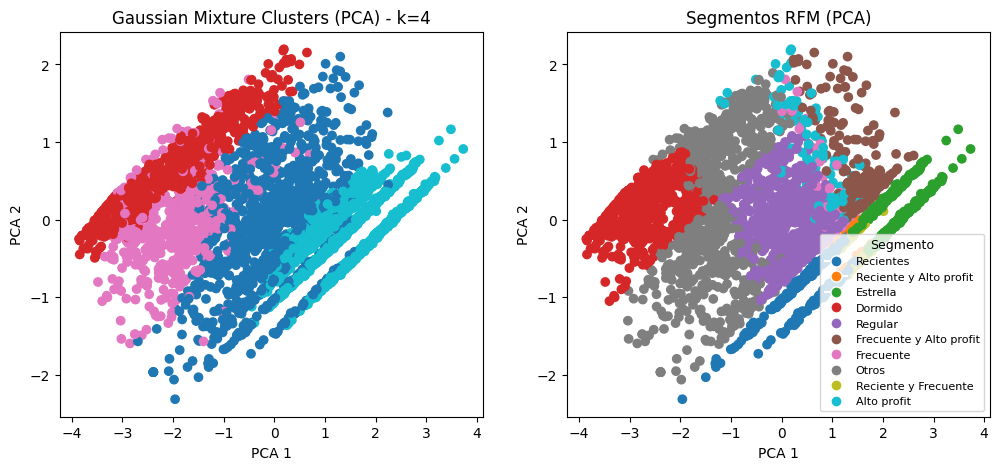

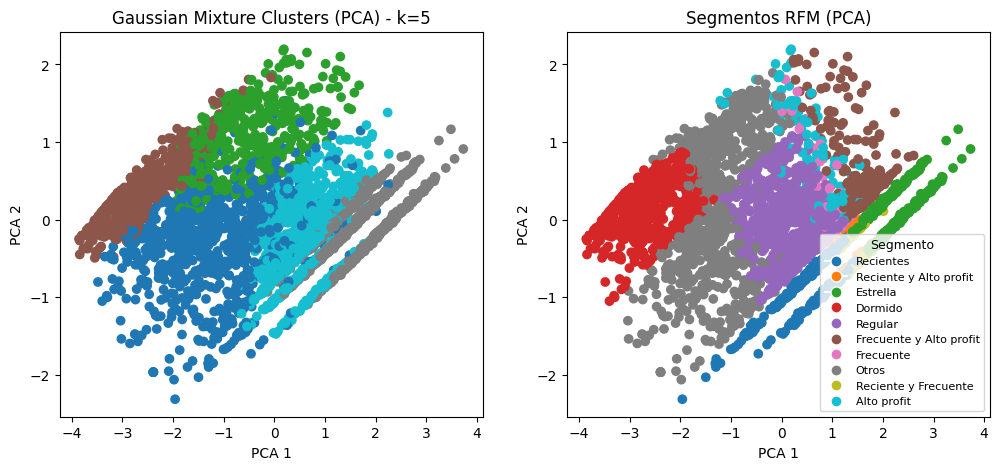

In [73]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, jaccard_score
from sklearn.preprocessing import LabelEncoder

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Probamos el número de clusters de 2 a 5 usando Gaussian Mixture
for k in range(2, 6):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gnm_labels = gmm.fit_predict(X)
    score = silhouette_score(X, gnm_labels)

    le = LabelEncoder()
    true_labels = le.fit_transform(rfm_segment2['segmento'])

    # predicted_labels: los clusters que generó tu algoritmo
    ari = adjusted_rand_score(true_labels, gnm_labels)
    jac = jaccard_score(true_labels, gnm_labels, average='macro')

    print(f"Adjusted Rand Index - k={k} :", ari)
    print(f"Jaccard Score - k={k}:", jac)

    # 1. Gaussian Mixture y Segmentos RFM en la misma imagen, en la misma fila, sin leyendas
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfica de Gaussian Mixture
    scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=gnm_labels, cmap='tab10')
    axes[0].set_title(f'Gaussian Mixture Clusters (PCA) - k={k}')
    axes[0].set_xlabel('PCA 1')
    axes[0].set_ylabel('PCA 2')
    # Sin leyenda

    # Gráfica de Segmentos RFM
    segment_map = {seg: i for i, seg in enumerate(rfm_segment2.segmento.unique())}
    segment_colors = [segment_map[x] for x in rfm_segment2.segmento[:len(X_pca)]]
    scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=segment_colors, cmap='tab10')
    axes[1].set_title('Segmentos RFM (PCA)')
    axes[1].set_xlabel('PCA 1')
    axes[1].set_ylabel('PCA 2')

    # Agregar leyenda solo para los segmentos RFM, más pequeña y en la parte inferior derecha
    from matplotlib.lines import Line2D
    handles = [Line2D([0], [0], marker='o', color='w', label=seg,
                      markerfacecolor=plt.cm.tab10(i), markersize=8)
               for seg, i in segment_map.items()]
    axes[1].legend(handles=handles, title="Segmento", loc='lower right', fontsize=8, title_fontsize=9)

### Cluster seleccionado

Adjusted Rand Index - k=3 : 0.3224392839637087
Jaccard Score - k=3: 0.0037578288100208767


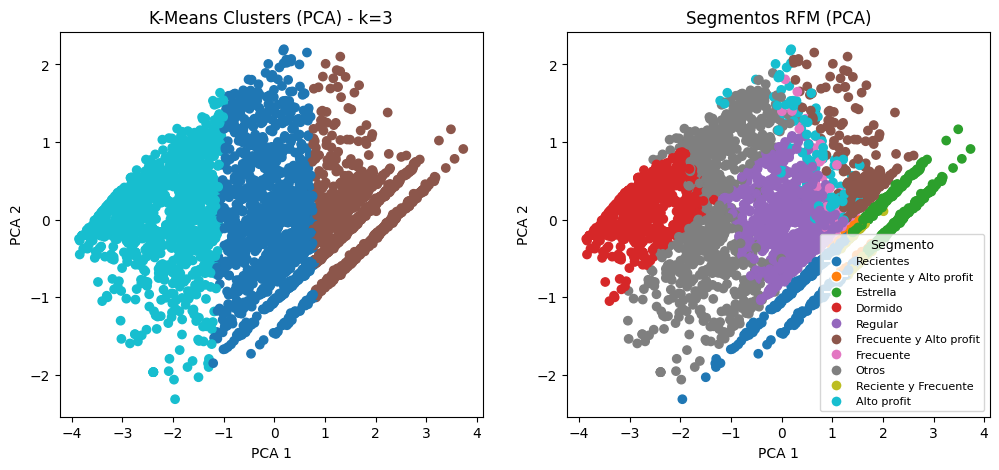

In [75]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=300, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_labels_array.append(kmeans_labels)
score = silhouette_score(X, kmeans_labels)

le = LabelEncoder()
true_labels = le.fit_transform(rfm_segment2['segmento'])
# predicted_labels: los clusters que generó tu algoritmo
ari = adjusted_rand_score(true_labels, kmeans_labels)
jac = jaccard_score(true_labels, kmeans_labels, average='macro')
print(f"Adjusted Rand Index - k={3} :", ari)
print(f"Jaccard Score - k={3}:", jac)
# 1. K-Means y Segmentos RFM en la misma imagen, en la misma fila, sin leyendas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Gráfica de K-Means
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='tab10')
axes[0].set_title(f'K-Means Clusters (PCA) - k={3}')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')
# Sin leyenda
# Gráfica de Segmentos RFM
segment_map = {seg: i for i, seg in enumerate(rfm_segment2.segmento.unique())}
segment_colors = [segment_map[x] for x in rfm_segment2.segmento[:len(X_pca)]]
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=segment_colors, cmap='tab10')
axes[1].set_title('Segmentos RFM (PCA)')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 2')
# Agregar leyenda solo para los segmentos RFM, más pequeña y en la parte inferior derecha
from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o', color='w', label=seg,
                  markerfacecolor=plt.cm.tab10(i), markersize=8)
           for seg, i in segment_map.items()]
axes[1].legend(handles=handles, title="Segmento", loc='lower right', fontsize=8, title_fontsize=9)

Considerando que las metricas internas concluimos que la cantidad de cluster mas optimas era igual a "3" y comparando con la segmentacion realizada consideramos que el algoritmo de K-means con 3 cluster es el que mejor se adapta a nuestro problema. Donde las renombrariamos al Cluster 1 (celeste) como "Menor ganancia", al Cluster 2 (azul) como "Media ganacia" y al Cluster 3 (marron) como "Mayor ganancia"

Comparativa de Métricas de Clustering por Algoritmo y K

| Algoritmo          | K | Adjusted Rand Index | Jaccard Score |
| :----------------- | :- | :------------------- | :------------- |
| **K-Means** | 2 | 0.205905            | 0.000250       |
|                    | 3 | 0.322439            | 0.003758       |
|                    | 4 | 0.326313            | 0.004637       |
|                    | 5 | 0.386693            | 0.001775       |
| **Agglomerative** | 2 | 0.161212            | 0.050330       |
|                    | 3 | 0.299093            | 0.090799       |
|                    | 4 | 0.293817            | 0.042943       |
|                    | 5 | 0.280634            | 0.005889       |
| **GaussianMixture**| 2 | 0.171350            | 0.004197       |
|                    | 3 | 0.237566            | 0.005326       |
|                    | 4 | 0.213853            | 0.049902       |
|                    | 5 | 0.307729            | 0.016782       |

#### Segmento: Frecuente y Alto profit

Compran con frecuencia, generan mucho ingreso, pero no tan recientes

Objetivo: Volver a activar la compra de estos productos

Acciones de marketing:

- Campaña de reactivación ofreciendo descuentos sobre estos productos.

- Recomendaciones via notificaciones ya sea mail o whatsapp sobre este producto.

- Poner estos productos en la parte principal para obtener mayor visualizacion

#### Segmento: Reciente y Alto profit

Compraron hace poco y generaron buen ingreso, pero con baja frecuencia

Objetivo: Aumentar frecuencia de compra

Acciones de marketing:

- Ofrecer ofertas en conjunto con otros productos complementarios.

- Cupones de descuento si realiza una segunda compra en X días.

- Promociones del tipo “lleva 2 y paga 1” o “descuento por suscripción”.

#### Riesgos y limitaciones
- Sin segmentación por paises: No se diferenciaron los productos comprados por clientes del Reino Unido frente a otros países, lo cual puede ocultar patrones de consumo.

- No se consideró estacionalidad: En nuestro analisis no tuvimos en cuenta si ciertos productos tienen comportamientos estacionales.

- No consideramos un analisis sobre los meses: No se analizaron las compras según el mes o trimestre, por lo que se pierden posibles tendencias como se encuentran en el aumento de los ultimos meses.